In [1]:
import importlib
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import minmax_scale
from sklearn import cluster
from sklearn import decomposition
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
excel_file = pd.ExcelFile('source_data.xlsx')

In [3]:
sheet0 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[0],
        skiprows=[0],
        header=1,
    )
sheet0 = sheet0[sheet0.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet0.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [4]:
sheet0.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,23,21,27,23,19,16,16,14,15,16,NaN
1,Брянская область,20,19,20,23,24,17,23,21,21,22,NaN
2,Владимирская область,35,32,30,30,25,25,24,23,22,25,NaN
3,Воронежская область,57,65,66,60,58,58,59,57,56,53,NaN
4,Ивановская область,30,28,23,21,19,21,17,20,19,20,NaN


In [5]:
sheet1 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[1],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet1 = sheet1[sheet1.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet1.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [6]:
sheet2 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[2],
        skiprows=[0, 1],
        header=1,
    )
sheet2 = sheet2[sheet2.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet2.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [7]:
sheet3 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[3],
        skiprows=[0, 1],
        header=1,
    )
sheet3 = sheet3[sheet3.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet3.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [8]:
sheet4 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[4],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet4 = sheet4[sheet4.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet4.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [9]:
sheet5 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[5],
        skiprows=[0, 1],
        header=1,
    )
sheet5 = sheet5[sheet5.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet5.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [10]:
sheet6 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[6],
        skiprows=[0, 1, 2, 3, 4],
        header=1,
    )
sheet6 = sheet6[sheet6.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet6.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [11]:
sheet7 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[7],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet7 = sheet7[sheet7.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet7.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [12]:
sheet8 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[8],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet8 = sheet8[sheet8.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet8.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [13]:
sheet9 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[9],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet9 = sheet9[sheet9.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet9.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [14]:
sheet10 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[10],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet10 = sheet10[sheet10.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet10.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [15]:
sheet11 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[11],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet11 = sheet11[sheet11.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet11.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [16]:
sheet12 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[12],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet12 = sheet12[sheet12.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet12.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [17]:
sheet13 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[13],
        skiprows=[0, 1],
        header=1,
    )
sheet13 = sheet13[sheet13.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet13.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [18]:
sheet14 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[14],
        skiprows=[0, 1],
        header=1,
    )
sheet14 = sheet14[sheet14.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet14.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [19]:
sheet15 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[15],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet15 = sheet15[sheet15.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet15.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [20]:
sheet16 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[16],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet16 = sheet16[sheet16.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet16.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [21]:
sheet17 = pd.read_excel('source_data_1.xlsx')
sheet17 = sheet17[sheet17.columns.drop(['Unnamed: 11', 'ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ'])]
sheet17.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [22]:
list_of_df = []
list_of_df.append([sheet0, 'OrganizationNum'])
list_of_df.append([sheet1, 'StaffNum'])
list_of_df.append([sheet2, 'PhDNum'])
list_of_df.append([sheet3, 'Ph.DNum'])
list_of_df.append([sheet4, 'PostgraduateNum'])
list_of_df.append([sheet5, 'DoctoralNum'])
list_of_df.append([sheet6, 'PatentNum'])
list_of_df.append([sheet7, 'UsefulPatentsNum'])
list_of_df.append([sheet8, 'CreatedTechnologyNum'])
list_of_df.append([sheet9, 'UsefulTechnologyNum'])
list_of_df.append([sheet10, 'ProportionOfOrganizationsToUseInternet'])
list_of_df.append([sheet11, 'ProportionOfInnovativeOrgainzations'])
list_of_df.append([sheet12, 'TechnologicalInnovationsCost'])
list_of_df.append([sheet13, 'AmountOfInnovativeProducts'])
list_of_df.append([sheet14, 'ProportionOfInnovativeProducts'])
list_of_df.append([sheet15, 'Population'])
list_of_df.append([sheet16, 'GrossProduct'])
list_of_df.append([sheet17, 'InternalCosts'])

In [23]:
features_names_ru = [
    'ОРГАНИЗАЦИИ, ВЫПОЛНЯЮЩИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ',
    'численность персонала без ученых степеней, занятых НИОКР',
    'Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации показатель кандидата наук- человек',
    'Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации показатель доктора наук- человек',
    'Численность аспирантов по субъектам Российской Федерации - человек',
    'Численность докторантов по субъектам Российской Федерации 0человек',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ИЗОБРЕТЕНИЯ',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ',
    'РАЗРАБОТАННЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ ) (В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)',
    'ИННОВАЦИОННАЯ АКТИВНОСТЬ ОРГАНИЗАЦИЙ (УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ, ОСУЩЕСТВЛЯВШИХ ТЕХНОЛОГИЧЕСКИЕ, ОРГАНИЗАЦИОННЫЕ, МАРКЕТИНГОВЫЕ ИННОВАЦИИ В ОТЧЕТНОМ ГОДУ, В ОБЩЕМ ЧИСЛЕ ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ ( %)',
    'ЗАТРАТЫ НА ТЕХНОЛОГИЧЕСКИЕ ИННОВАЦИИ ОРГАНИЗАЦИЙ (руб)',
    'ОБЪЕМ ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ (МИЛЛИОНОВ РУБЛЕЙ)',
    'УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ, УСЛУГ1), ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)',
    'численность населения по субъектам российской федерации (оценка на конец года; тысяч человек)',
    'Валовой региональный продукт по субъектам Российской Федерации (в текущих  ценах;миллионов рублей)'
]
print(len(features_names_ru))

17


In [24]:
for i, df_container in enumerate(list_of_df):
    df = df_container[0]
    list_of_df[i][0] = df[df.Region != 'ВСЕГО']    

In [25]:
merged_df_list = []
for year in range(2005, 2015):
    result_df, feature_name = list_of_df[0]
    result_df = result_df[['Region', year]]

    #result_df.rename_axis({year: feature_name} ,axis='columns', inplace=True)
    result_df = result_df.rename_axis({year: feature_name} ,axis='columns')
    
    merged_df_list.append(result_df)
    
    for i in range(1, 18):
        merged_df, feature_name = list_of_df[i]
        merged_df = merged_df[['Region', year]]
        #merged_df.rename_axis({year: feature_name} ,axis='columns', inplace=True)
        merged_df = merged_df.rename_axis({year: feature_name} ,axis='columns')
        merged_df_list[year - 2005] = pd.merge(
            merged_df_list[year - 2005],
            merged_df,
            on='Region')

In [26]:
def str_to_num(s):
    if isinstance(s, str):
        s = s.replace(',', '.')
        s1 = s.replace(',', '')
        if s1.isdigit():
            return float(s)
    return s

In [27]:
df0 = merged_df_list[0]

In [28]:
def detect_minus(x):
    if x == '-':
        print(x)
        return True
    return False

In [29]:
df0 = df0.applymap(str_to_num)
df0.set_value(36, 'PostgraduateNum', 0)

,Region,OrganizationNum,StaffNum,PhDNum,Ph.DNum,PostgraduateNum,DoctoralNum,PatentNum,UsefulPatentsNum,CreatedTechnologyNum,UsefulTechnologyNum,ProportionOfOrganizationsToUseInternet,ProportionOfInnovativeOrgainzations,TechnologicalInnovationsCost,AmountOfInnovativeProducts,ProportionOfInnovativeProducts,Population,GrossProduct,InternalCosts
0,Белгородская область,23,559,92,15,1003,36,77,45,16,550,48.0,8.7,1204.6,2206.9,1.5,1511,144987.8,245
1,Брянская область,20,1136,44,8,472,20,38,10,0,690,40.8,6.2,440.0,4461.4,11.3,1331,66692.3,249.7
2,Владимирская область,35,2337,297,52,606,16,118,46,11,1653,48.5,10.7,673.5,3390.6,4.0,1473,86926.8,1463.1
3,Воронежская область,57,6114,783,119,2347,65,449,70,11,1805,56.9,12.2,1733.9,6407.7,7.3,2314,133586.6,2140.4
4,Ивановская область,30,435,196,48,919,44,98,35,0,432,38.3,4.5,494.2,452.3,1.3,1100,44415.4,228.8
5,Калужская область,33,3495,787,205,366,1,113,58,4,2130,47.8,14.0,1020.1,2715.1,5.3,1014,70953.9,2362.9
6,Костромская область,8,71,18,2,438,0,42,19,1,1027,33.8,9.2,604.5,1523.5,4.8,709,44684.7,21.4
7,Курская область,23,713,66,24,960,18,125,59,1,1341,30.8,6.7,1080.2,1428.8,2.0,1184,86624.9,728.2
8,Липецкая область,10,49,43,27,0,0,81,10,0,646,50.4,11.6,927.3,6937.6,3.9,1181,145194.4,33.7
9,Московская область,206,30899,6456,1659,2740,63,1605,448,32,12771,58.1,10.0,7538.2,40005.3,9.7,6628,708062.1,21738.6


In [30]:
df0_names_row_numbers_map = [(i, name) for i, name in enumerate(df0['Region'])]
df0_names_columns_numbers_map = [(i, name) for i, name in enumerate(df0.columns)]

In [31]:
cluster_data = df0.values

In [32]:
normalized_cluster_data = minmax_scale(cluster_data[:, 1:].astype('float'))

In [33]:
km = cluster.KMeans(n_clusters=3)

In [34]:
y_km = km.fit_predict(normalized_cluster_data)

In [35]:
km.fit(normalized_cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
def draw_clusters(
    clusters_num,
    axes,
    X,
    y_km,
    x_coord,
    y_coord,
    markers,
    colors,
    centres_color='red',
    centres_marker='*',
    cluster_centers=None,
    region_names=None,
    fontsize=24,
    region_s=300,
    centres_s = 200,
    xlim=(0, 1),
    ylim=(0, 1),
    legend_loc=2):
    for i in range(clusters_num):
        mask = y_km == i
        axes.scatter(
            X[mask, x_coord],
            X[mask, y_coord],
            s=300,
            c=colors[i],
            marker=markers[i],
            label="cluster %s" % i
        )
        
    if cluster_centers is not None:   
        axes.scatter(
            cluster_centers[:, x_coord],
            cluster_centers[:, y_coord],
            s=centres_s,
            marker=centres_marker,
            c=centres_color,
            label='centroids'
           )
    axes.legend(loc=legend_loc, prop={'size': fontsize})
    #plt.show()

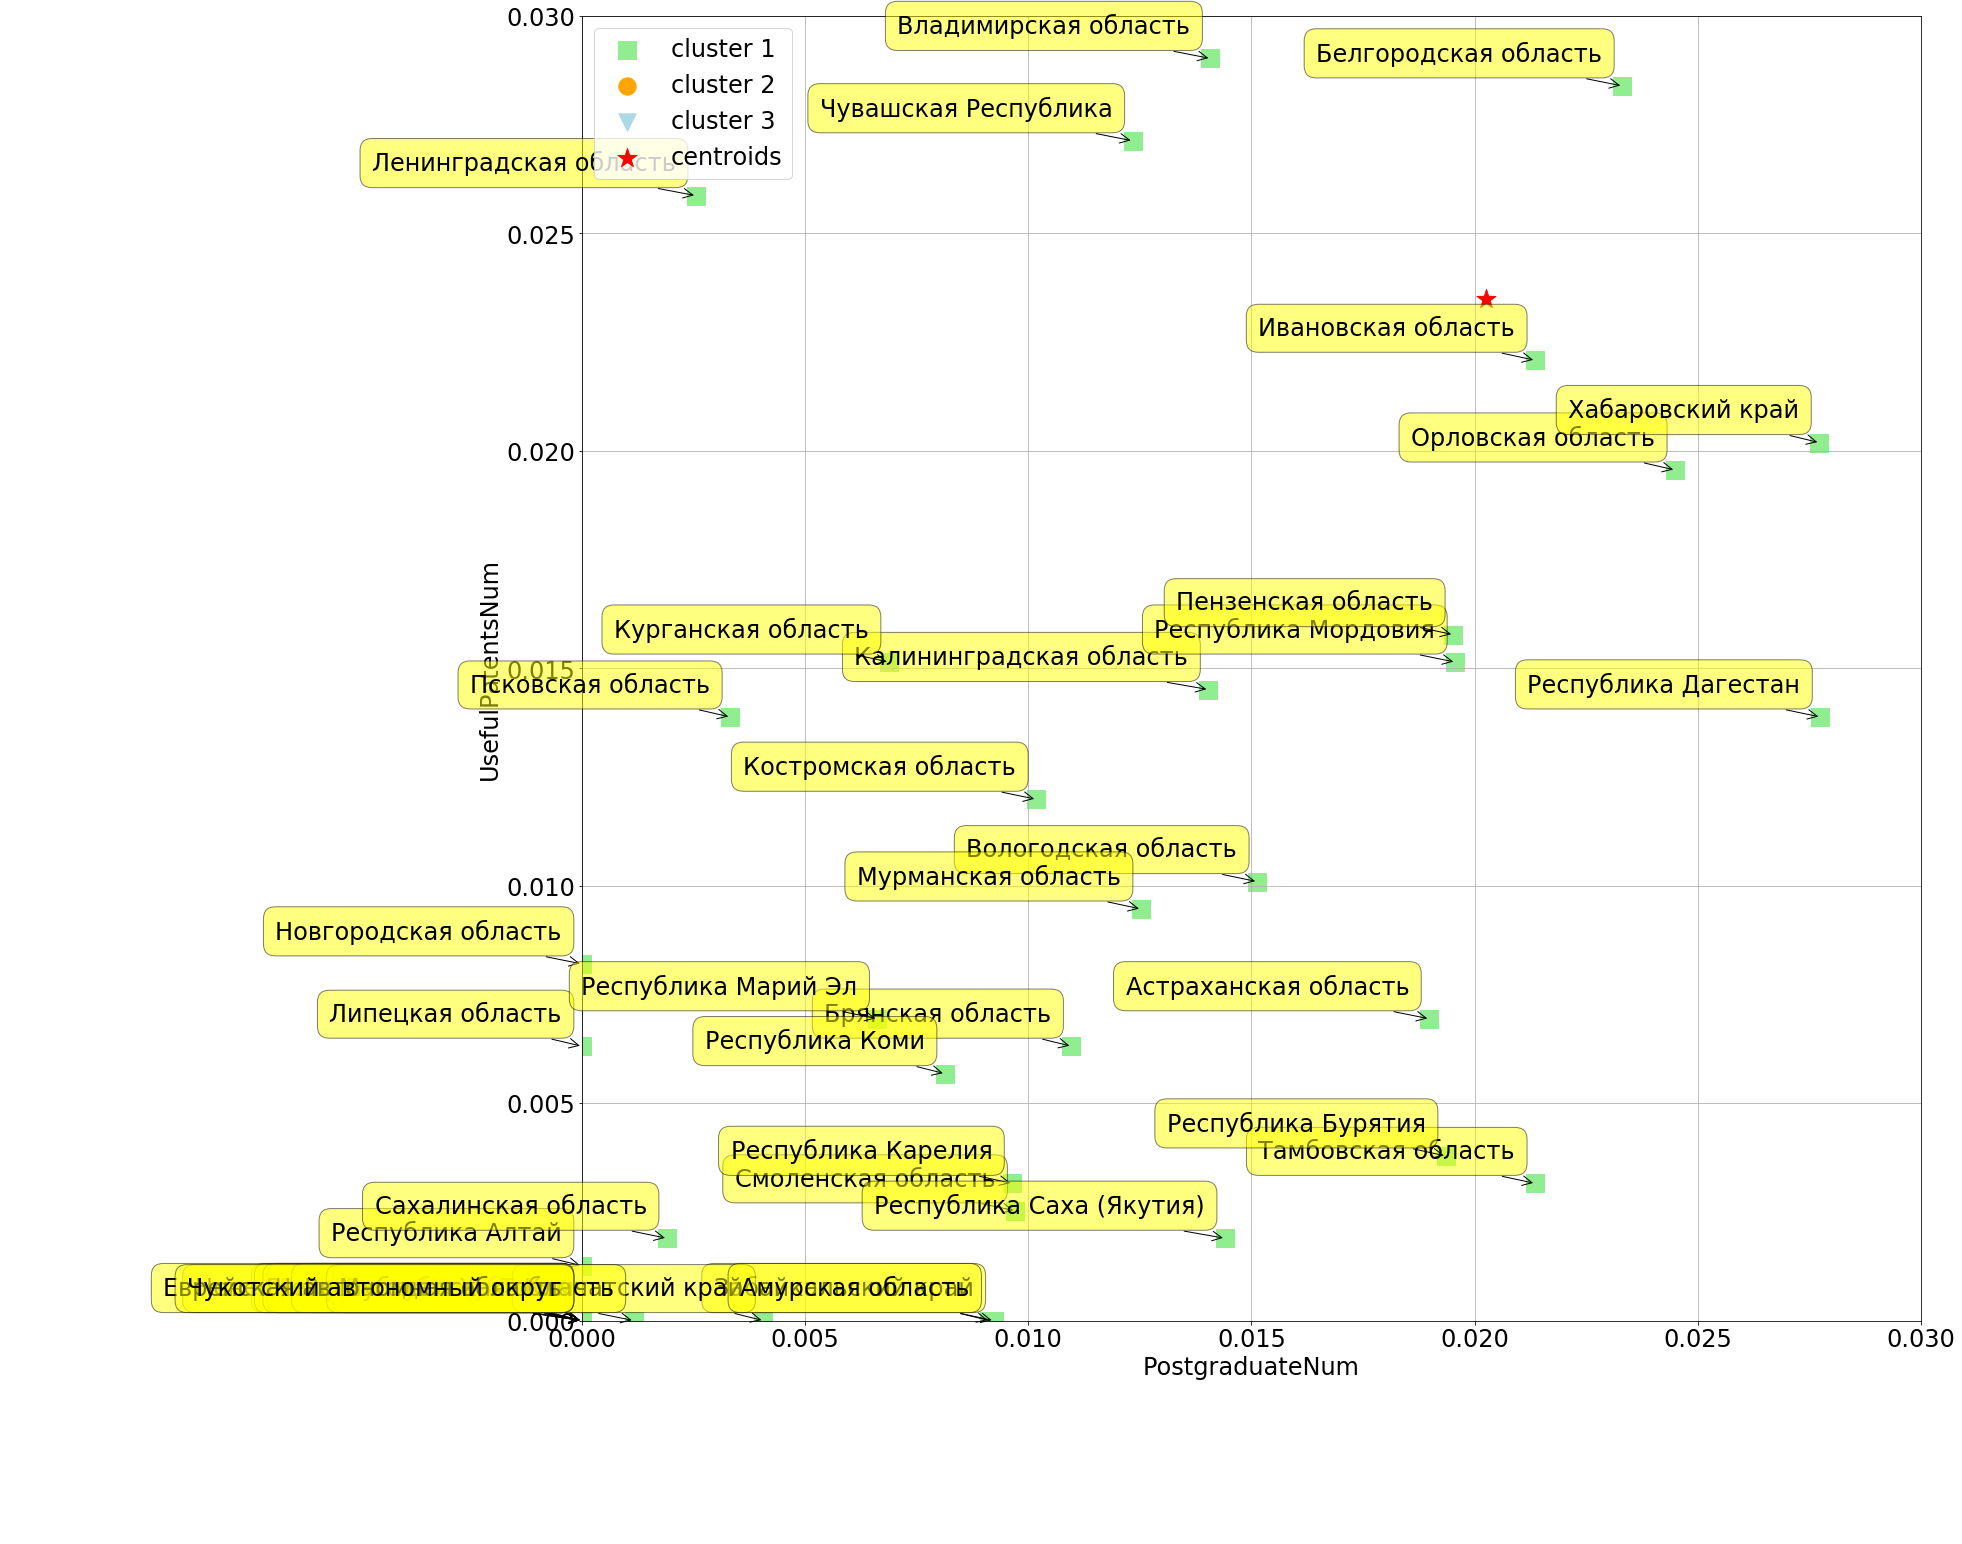

In [37]:
X = normalized_cluster_data

figure = plt.figure(figsize=(24, 24))

axes = figure.add_subplot(111)
axes.scatter(X[y_km == 0, 4],
            X[y_km == 0, 7],
            s=300,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
#for i in range(X[y_km == 0].shape[0]):
#   axes.annotate(i, X[i, 4], X[i, 7])

#labels = ['point{0}'.format(i) for i in range(X[y_km == 0].shape[0])]
labels = df0['Region'][y_km == 0].tolist()

#plt.subplots_adjust(bottom = 0.1)
#plt.scatter(
#    data[:, 0], data[:, 1], marker='o', c=data[:, 2], s=data[:, 3] * 1500,
#    cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(labels, X[y_km == 0, 4], X[y_km == 0, 7]):
    axes.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'), fontsize=24)

axes.scatter(X[y_km == 1, 4],
            X[y_km == 1, 7],
            s=300,
            c='orange',
            marker='o',
            label='cluster 2'
           )
axes.scatter(X[y_km == 2, 4],
            X[y_km == 2, 7],
            s=300,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
axes.scatter(km.cluster_centers_[:, 4],
            km.cluster_centers_[:, 7],
            s=400,
            marker='*',
            c='red',
            label='centroids'
           )
axes.set_xlabel(list_of_df[4][1])
axes.set_ylabel(list_of_df[7][1])
#axes.set_xlim([0, 600])
#axes.set_ylim([0, 600])

#axes.set_xlim([0, 0.1])
#axes.set_ylim([0, 0.3])

#axes.set_xlim([0, 0.1])
#axes.set_ylim([0, 0.1])

axes.set_xlim([0, 0.03])
axes.set_ylim([0, 0.03])

#axes.set_xlim([0, 0.005])
#axes.set_ylim([0, 0.005])

#axes.set_xlim([0, 0.001])
#axes.set_ylim([0, 0.001])
for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(24)
axes.legend(loc=2, prop={'size':24})
axes.grid()

plt.show()

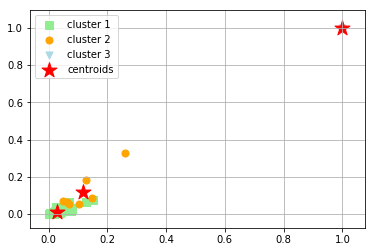

In [38]:
X = normalized_cluster_data
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

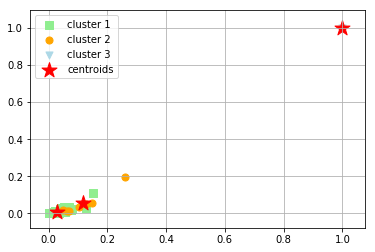

In [39]:
X = normalized_cluster_data
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 2],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 2],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 2],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

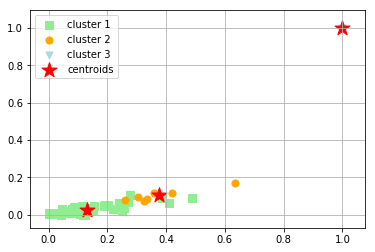

In [40]:
X = normalized_cluster_data
plt.scatter(X[y_km == 0, 15],
            X[y_km == 0, 16],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_km == 1, 15],
            X[y_km == 1, 16],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_km == 2, 15],
            X[y_km == 2, 16],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(km.cluster_centers_[:, 15],
            km.cluster_centers_[:, 16],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

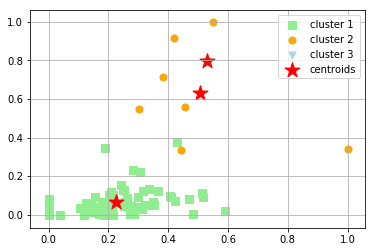

In [41]:
X = normalized_cluster_data
plt.scatter(X[y_km == 0, 11],
            X[y_km == 0, 12],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_km == 1, 11],
            X[y_km == 1, 12],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_km == 2, 11],
            X[y_km == 2, 12],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(km.cluster_centers_[:, 11],
            km.cluster_centers_[:, 12],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

In [42]:
y_km_1 = km.predict(normalized_cluster_data)

In [43]:
df0.var()

OrganizationNum                           8.495023e+03
StaffNum                                  1.270401e+08
PhDNum                                    1.427936e+07
Ph.DNum                                   1.670607e+06
DoctoralNum                               1.599555e+04
PatentNum                                 3.900249e+05
UsefulPatentsNum                          3.772189e+04
CreatedTechnologyNum                      2.086480e+02
UsefulTechnologyNum                       8.622874e+06
ProportionOfOrganizationsToUseInternet    2.471633e+02
Population                                2.562813e+06
GrossProduct                              2.251749e+11
dtype: float64

In [44]:
df0.std()

OrganizationNum                               92.168447
StaffNum                                   11271.206427
PhDNum                                      3778.804669
Ph.DNum                                     1292.519592
DoctoralNum                                  126.473496
PatentNum                                    624.519707
UsefulPatentsNum                             194.221227
CreatedTechnologyNum                          14.444652
UsefulTechnologyNum                         2936.473095
ProportionOfOrganizationsToUseInternet        15.721428
Population                                  1600.878841
GrossProduct                              474525.978682
dtype: float64

In [45]:
df0_drop_regions = df0[df0.columns.drop(['Region'])]

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
df0_scaled = pd.DataFrame(scaler.fit_transform(df0_drop_regions), columns=df0_drop_regions.columns)

In [49]:
df0_scaled.corr().round(2)

,OrganizationNum,StaffNum,PhDNum,Ph.DNum,PostgraduateNum,DoctoralNum,PatentNum,UsefulPatentsNum,CreatedTechnologyNum,UsefulTechnologyNum,ProportionOfOrganizationsToUseInternet,ProportionOfInnovativeOrgainzations,TechnologicalInnovationsCost,AmountOfInnovativeProducts,ProportionOfInnovativeProducts,Population,GrossProduct,InternalCosts
OrganizationNum,1.00,0.98,0.98,0.98,0.97,0.96,0.99,0.96,0.88,0.57,0.33,0.29,0.55,0.29,0.21,0.82,0.98,0.98
StaffNum,0.98,1.00,0.98,0.97,0.95,0.93,0.98,0.96,0.89,0.63,0.31,0.28,0.54,0.29,0.21,0.79,0.96,1.00
PhDNum,0.98,0.98,1.00,1.00,0.98,0.96,0.98,0.94,0.83,0.49,0.32,0.22,0.46,0.21,0.14,0.73,0.98,0.99
Ph.DNum,0.98,0.97,1.00,1.00,0.98,0.96,0.97,0.93,0.82,0.46,0.31,0.21,0.44,0.19,0.13,0.71,0.98,0.98
PostgraduateNum,0.97,0.95,0.98,0.98,1.00,0.99,0.96,0.94,0.83,0.46,0.33,0.26,0.48,0.23,0.17,0.75,0.98,0.96
DoctoralNum,0.96,0.93,0.96,0.96,0.99,1.00,0.95,0.92,0.81,0.44,0.35,0.31,0.50,0.24,0.18,0.76,0.96,0.94
PatentNum,0.99,0.98,0.98,0.97,0.96,0.95,1.00,0.97,0.85,0.56,0.34,0.29,0.55,0.31,0.23,0.84,0.98,0.98
UsefulPatentsNum,0.96,0.96,0.94,0.93,0.94,0.92,0.97,1.00,0.89,0.61,0.32,0.34,0.67,0.47,0.35,0.83,0.96,0.97
CreatedTechnologyNum,0.88,0.89,0.83,0.82,0.83,0.81,0.85,0.89,1.00,0.75,0.24,0.34,0.62,0.40,0.29,0.77,0.84,0.89
UsefulTechnologyNum,0.57,0.63,0.49,0.46,0.46,0.44,0.56,0.61,0.75,1.00,0.18,0.39,0.57,0.37,0.28,0.67,0.50,0.60


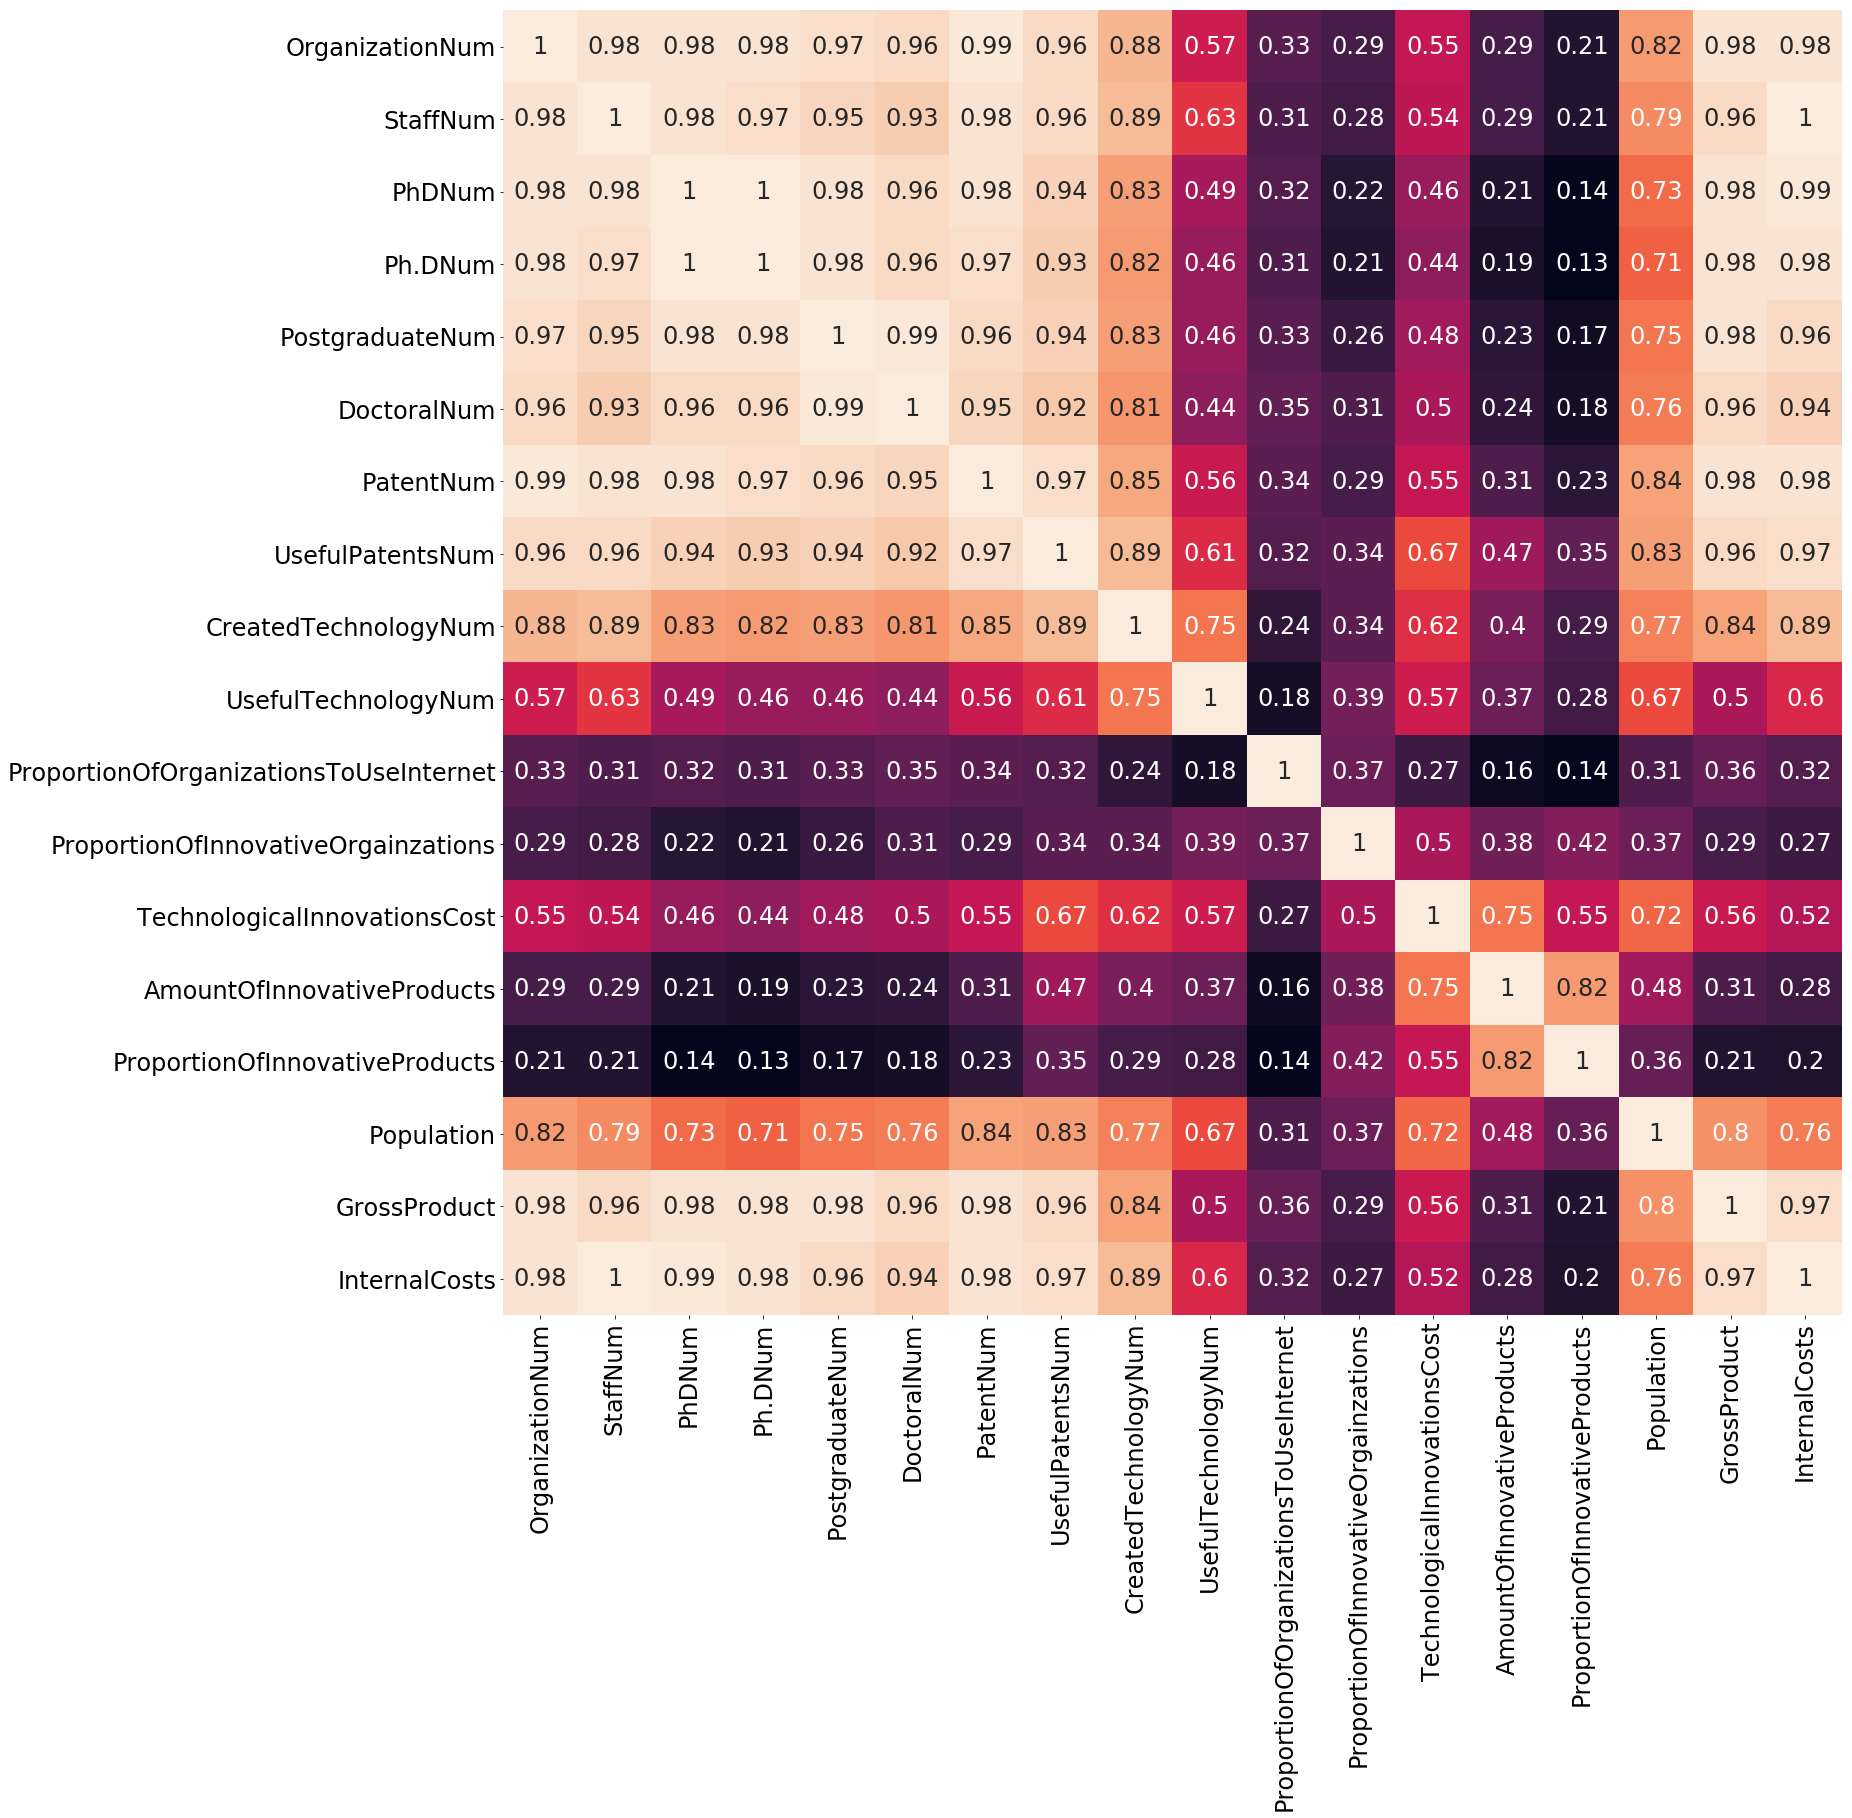

In [50]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(df0_scaled.corr().round(2), annot=True, annot_kws={"size":24}, cbar=False)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

In [51]:
merged_df_list[0].set_value(36, 'PostgraduateNum', 0)


,Region,OrganizationNum,StaffNum,PhDNum,Ph.DNum,PostgraduateNum,DoctoralNum,PatentNum,UsefulPatentsNum,CreatedTechnologyNum,UsefulTechnologyNum,ProportionOfOrganizationsToUseInternet,ProportionOfInnovativeOrgainzations,TechnologicalInnovationsCost,AmountOfInnovativeProducts,ProportionOfInnovativeProducts,Population,GrossProduct,InternalCosts
0,Белгородская область,23,559,92,15,1003,36,77,45,16,550,48.0,"8,7","1204,6","2206,9","1,5",1511,144987.8,245
1,Брянская область,20,1136,44,8,472,20,38,10,0,690,40.8,"6,2","440,0","4461,4","11,3",1331,66692.3,"249,7"
2,Владимирская область,35,2337,297,52,606,16,118,46,11,1653,48.5,"10,7","673,5","3390,6","4,0",1473,86926.8,"1463,1"
3,Воронежская область,57,6114,783,119,2347,65,449,70,11,1805,56.9,"12,2","1733,9","6407,7","7,3",2314,133586.6,"2140,4"
4,Ивановская область,30,435,196,48,919,44,98,35,0,432,38.3,"4,5","494,2","452,3","1,3",1100,44415.4,"228,8"
5,Калужская область,33,3495,787,205,366,1,113,58,4,2130,47.8,"14,0","1020,1","2715,1","5,3",1014,70953.9,"2362,9"
6,Костромская область,8,71,18,2,438,0,42,19,1,1027,33.8,"9,2","604,5","1523,5","4,8",709,44684.7,"21,4"
7,Курская область,23,713,66,24,960,18,125,59,1,1341,30.8,"6,7","1080,2","1428,8","2,0",1184,86624.9,"728,2"
8,Липецкая область,10,49,43,27,0,0,81,10,0,646,50.4,"11,6","927,3","6937,6","3,9",1181,145194.4,"33,7"
9,Московская область,206,30899,6456,1659,2740,63,1605,448,32,12771,58.1,"10,0","7538,2","40005,3","9,7",6628,708062.1,"21738,6"


In [52]:
merged_df_list[0].set_value(36, 'PostgraduateNum', 0)
merged_df_list[0].set_value(41, 'GrossProduct', 167139716)
merged_df_dict = {}
for i in range(0, 10):
    prepared_df = merged_df_list[i].applymap(str_to_num)
    prepared_df = prepared_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)
    merged_df_dict[i + 2005] = prepared_df   

In [53]:
#merged_df_dict
hier_concatenated_df = pd.concat(merged_df_dict, names=['Year', 'Region'])

In [54]:
hier_concatenated_df.shape

(770, 19)

In [55]:
#hier_concatenated_df
print(hier_concatenated_df.index)
print(hier_concatenated_df.index.names)

MultiIndex(levels=[[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [56]:
hier_concatenated_df = hier_concatenated_df.applymap(str_to_num)
hier_concatenated_df = hier_concatenated_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)

In [57]:
for column_name in hier_concatenated_df.columns:
    print(column_name)
    print(hier_concatenated_df.loc[hier_concatenated_df[column_name].astype(str) == '1.671.397.1.6'])

Region
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnologyNum, ProportionOfOrganizationsToUseInternet, ProportionOfInnovativeOrgainzations, TechnologicalInnovationsCost, AmountOfInnovativeProducts, ProportionOfInnovativeProducts, Population, GrossProduct, InternalCosts]
Index: []
OrganizationNum
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnologyNum, ProportionOfOrganizationsToUseInternet, ProportionOfInnovativeOrgainzations, TechnologicalInnovationsCost, AmountOfInnovativeProducts, ProportionOfInnovativeProducts, Population, GrossProduct, InternalCosts]
Index: []
StaffNum
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnol

In [58]:
print(hier_concatenated_df.loc[(2014, 41), 'GrossProduct'])

1.671.397.1.6


In [59]:
hier_concatenated_df.loc[(2014, 41), 'GrossProduct'] = 167139716

In [60]:
print(hier_concatenated_df.columns)

Index(['Region', 'OrganizationNum', 'StaffNum', 'PhDNum', 'Ph.DNum',
       'PostgraduateNum', 'DoctoralNum', 'PatentNum', 'UsefulPatentsNum',
       'CreatedTechnologyNum', 'UsefulTechnologyNum',
       'ProportionOfOrganizationsToUseInternet',
       'ProportionOfInnovativeOrgainzations', 'TechnologicalInnovationsCost',
       'AmountOfInnovativeProducts', 'ProportionOfInnovativeProducts',
       'Population', 'GrossProduct', 'InternalCosts'],
      dtype='object')


In [61]:
droped_regions_hier_concatenated_df = hier_concatenated_df[hier_concatenated_df.columns.drop('Region')]

In [62]:
droped_regions_hier_concatenated_df.head()

OrganizationNum  StaffNum  PhDNum  Ph.DNum  PostgraduateNum  \
Year Region                                                                
2005 0                    23       559      92       15             1003   
     1                    20      1136      44        8              472   
     2                    35      2337     297       52              606   
     3                    57      6114     783      119             2347   
     4                    30       435     196       48              919   

             DoctoralNum  PatentNum  UsefulPatentsNum  CreatedTechnologyNum  \
Year Region                                                                   
2005 0              36.0       77.0                45                    16   
     1              20.0       38.0                10                     0   
     2              16.0      118.0                46                    11   
     3              65.0      449.0                70                    11   
     4              44.0       98.0                35                     0   

             UsefulTechnologyNum  ProportionOfOrganizationsToUseInternet  \
Year Region                                                                
2005 0                       550                                    48.0   
     1                       690                                    40.8   
     2                      1653                                    48.5   
     3                      1805                                    56.9   
     4                       432                                    38.3   

            ProportionOfInnovativeOrgainzations TechnologicalInnovationsCost  \
Year Region                                                                    
2005 0                                      8.7                       1204.6   
     1                                      6.2                        440.0   
     2                                     10.7                        673.5   
     3                                     12.2                       1733.9   
     4                                      4.5                        494.2   

            AmountOfInnovativeProducts ProportionOfInnovativeProducts  \
Year Region                                                             
2005 0                          2206.9                            1.5   
     1                          4461.4                           11.3   
     2                          3390.6                            4.0   
     3                          6407.7                            7.3   
     4                           452.3                            1.3   

             Population GrossProduct InternalCosts  
Year Region                                         
2005 0             1511       144988           245  
     1             1331      66692.3         249.7  
     2             1473      86926.8        1463.1  
     3             2314       133587        2140.4  
     4             1100      44415.4         228.8

In [63]:
for column_name in hier_concatenated_df.columns:
    print(column_name)
    print(hier_concatenated_df.loc[hier_concatenated_df[column_name].astype(str) == '395.700.1'])

Region
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnologyNum, ProportionOfOrganizationsToUseInternet, ProportionOfInnovativeOrgainzations, TechnologicalInnovationsCost, AmountOfInnovativeProducts, ProportionOfInnovativeProducts, Population, GrossProduct, InternalCosts]
Index: []
OrganizationNum
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnologyNum, ProportionOfOrganizationsToUseInternet, ProportionOfInnovativeOrgainzations, TechnologicalInnovationsCost, AmountOfInnovativeProducts, ProportionOfInnovativeProducts, Population, GrossProduct, InternalCosts]
Index: []
StaffNum
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnol

In [64]:
hier_concatenated_df.loc[(2014, 8), 'GrossProduct'] = 3957001

In [65]:
droped_regions_hier_concatenated_df = hier_concatenated_df[hier_concatenated_df.columns.drop('Region')]

In [66]:
scaled_with_dropped_regions_hier_concantenated_df = pd.DataFrame(
        scaler.fit_transform(droped_regions_hier_concatenated_df),
        columns=droped_regions_hier_concatenated_df.columns
    )

In [67]:
prepared_df_values = scaled_with_dropped_regions_hier_concantenated_df.values
bandwidth = cluster.estimate_bandwidth(prepared_df_values, quantile=0.1, n_samples=prepared_df_values.shape[0])
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(prepared_df_values)
labels = ms.labels_
cluster_centres = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


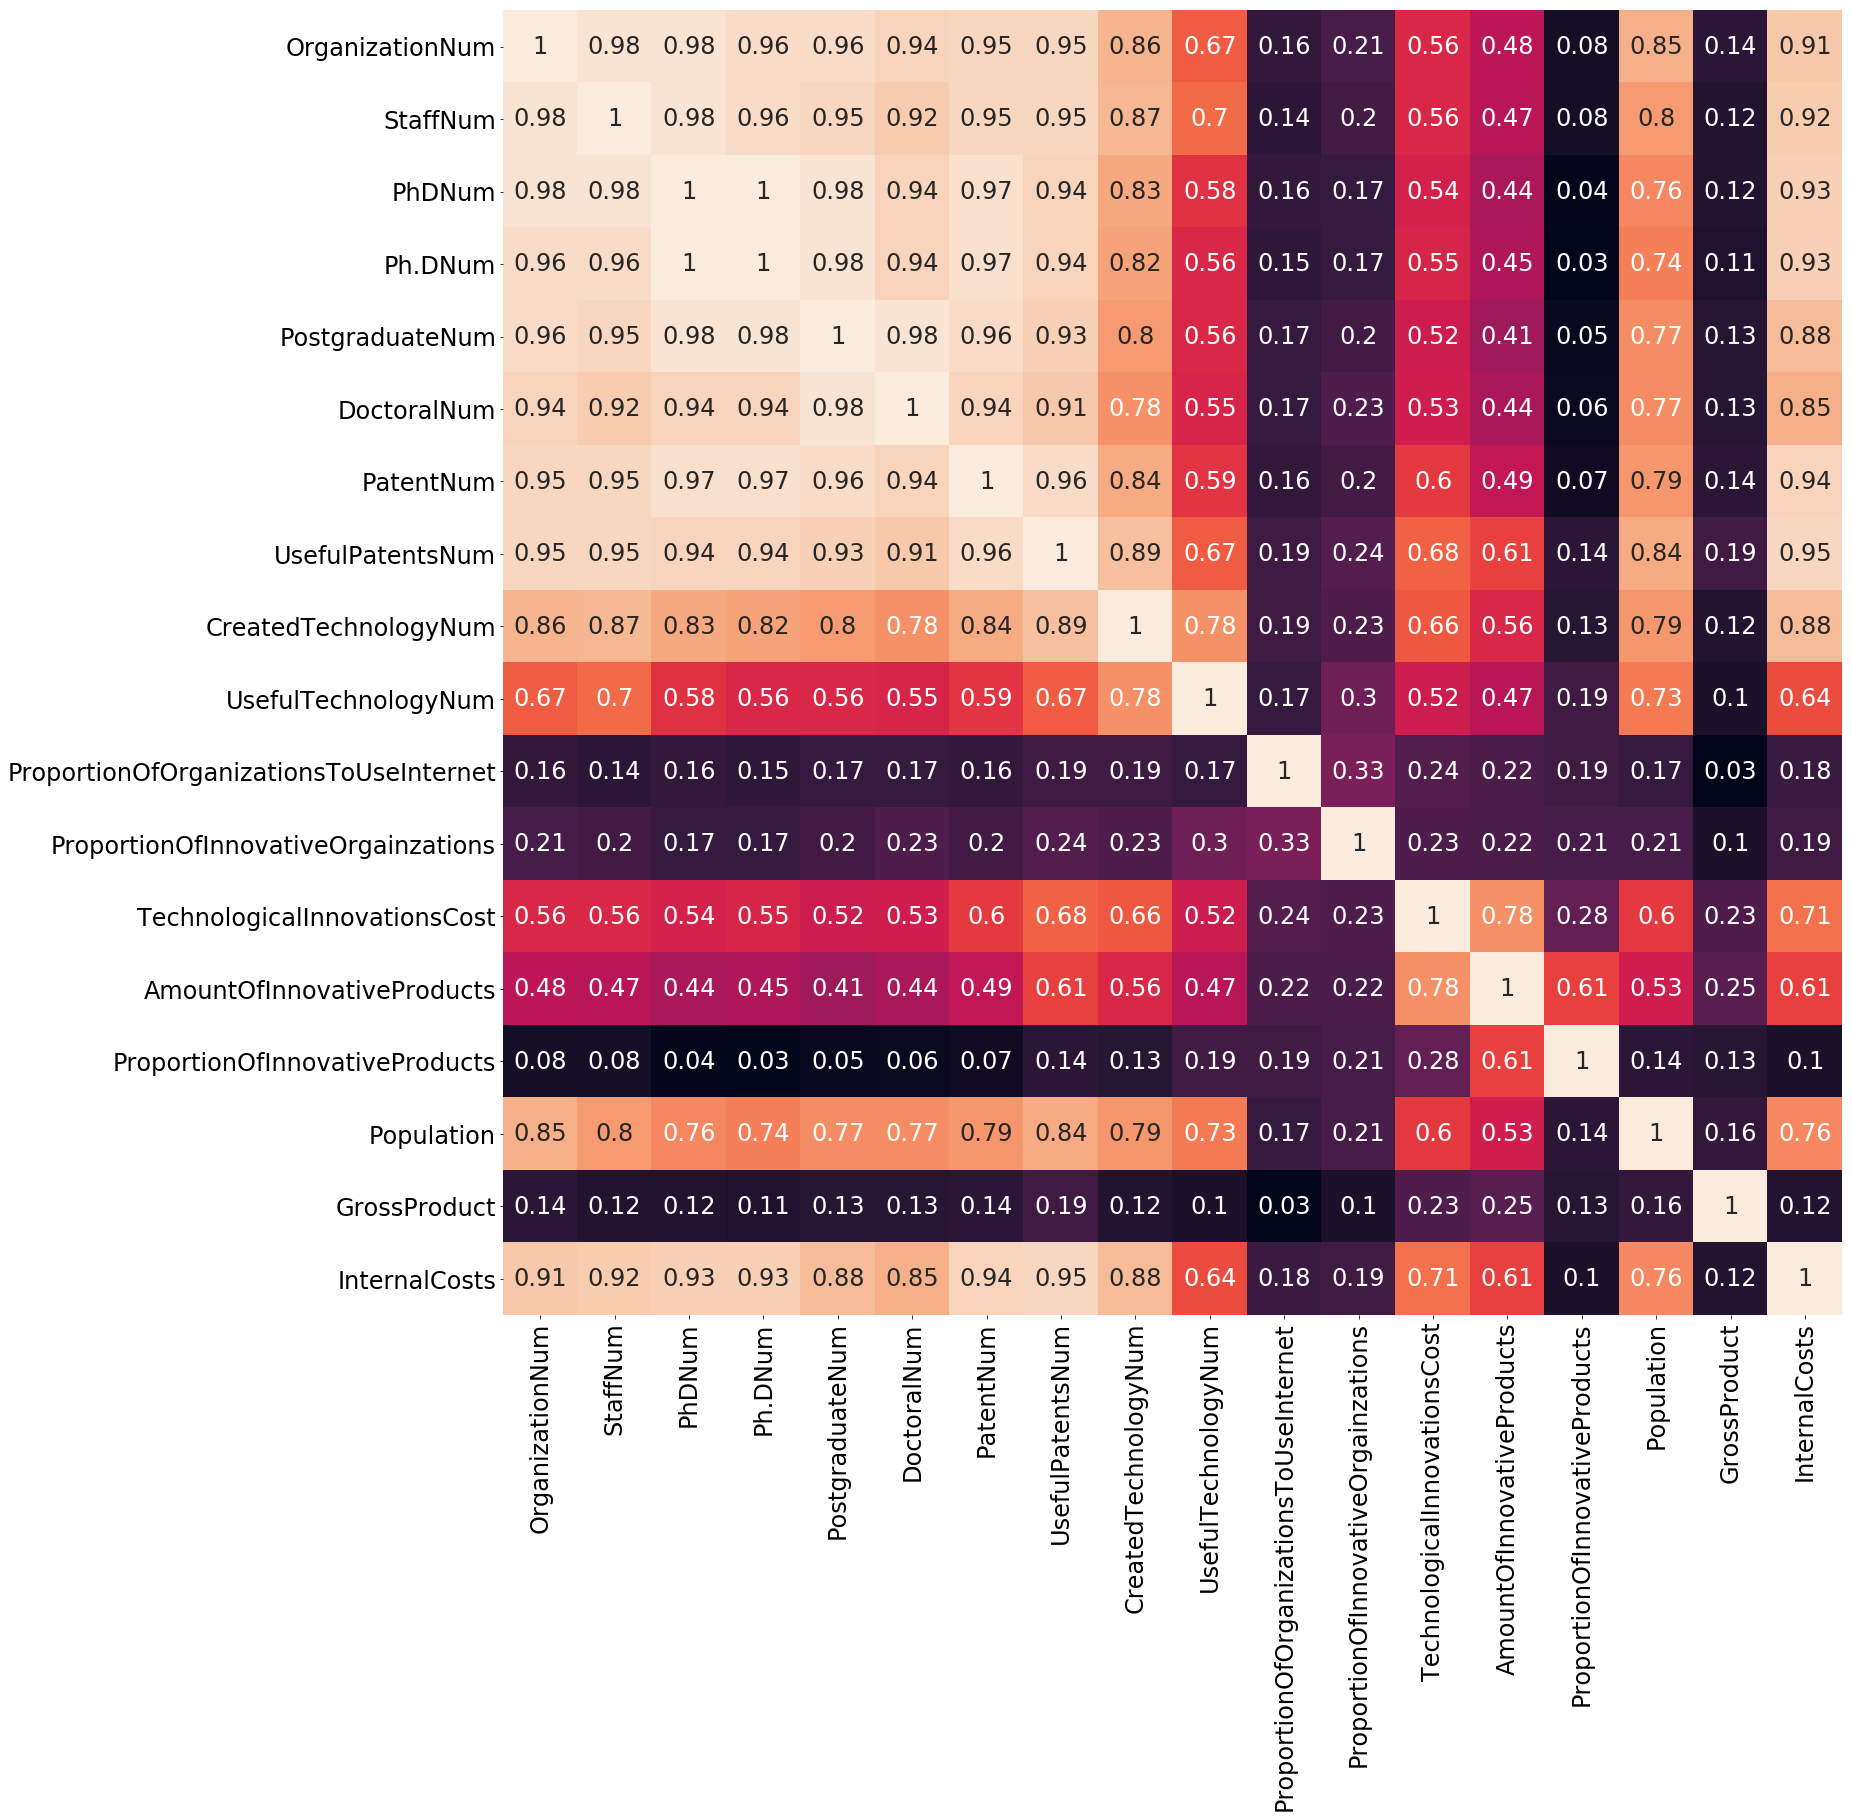

In [68]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(scaled_with_dropped_regions_hier_concantenated_df.corr().round(2), annot=True, annot_kws={"size":24}, cbar=False)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

In [69]:
cross_corr_matrix = scaled_with_dropped_regions_hier_concantenated_df.corr()

In [70]:
print(cross_corr_matrix)

                                        OrganizationNum  StaffNum    PhDNum  \
OrganizationNum                                1.000000  0.984524  0.976714   
StaffNum                                       0.984524  1.000000  0.976131   
PhDNum                                         0.976714  0.976131  1.000000   
Ph.DNum                                        0.963366  0.961487  0.996944   
PostgraduateNum                                0.960735  0.947532  0.976334   
DoctoralNum                                    0.942178  0.917075  0.944895   
PatentNum                                      0.952180  0.947252  0.968799   
UsefulPatentsNum                               0.953175  0.945972  0.942370   
CreatedTechnologyNum                           0.864473  0.871643  0.827853   
UsefulTechnologyNum                            0.673509  0.696596  0.580932   
ProportionOfOrganizationsToUseInternet         0.155486  0.142363  0.155502   
ProportionOfInnovativeOrgainzations            0.205

In [71]:
print(cross_corr_matrix['ProportionOfOrganizationsToUseInternet'])

OrganizationNum                           0.155486
StaffNum                                  0.142363
PhDNum                                    0.155502
Ph.DNum                                   0.153031
PostgraduateNum                           0.165354
DoctoralNum                               0.173614
PatentNum                                 0.160220
UsefulPatentsNum                          0.186983
CreatedTechnologyNum                      0.187036
UsefulTechnologyNum                       0.168732
ProportionOfOrganizationsToUseInternet    1.000000
ProportionOfInnovativeOrgainzations       0.328612
TechnologicalInnovationsCost              0.236212
AmountOfInnovativeProducts                0.222080
ProportionOfInnovativeProducts            0.190512
Population                                0.173437
GrossProduct                              0.028855
InternalCosts                             0.178800
Name: ProportionOfOrganizationsToUseInternet, dtype: float64


In [72]:
print(cross_corr_matrix['UsefulTechnologyNum'])

OrganizationNum                           0.673509
StaffNum                                  0.696596
PhDNum                                    0.580932
Ph.DNum                                   0.556491
PostgraduateNum                           0.563280
DoctoralNum                               0.549739
PatentNum                                 0.590269
UsefulPatentsNum                          0.672532
CreatedTechnologyNum                      0.775376
UsefulTechnologyNum                       1.000000
ProportionOfOrganizationsToUseInternet    0.168732
ProportionOfInnovativeOrgainzations       0.295222
TechnologicalInnovationsCost              0.524366
AmountOfInnovativeProducts                0.470333
ProportionOfInnovativeProducts            0.192778
Population                                0.726452
GrossProduct                              0.096941
InternalCosts                             0.643013
Name: UsefulTechnologyNum, dtype: float64


In [73]:
print(cross_corr_matrix['ProportionOfInnovativeOrgainzations'])

OrganizationNum                           0.205519
StaffNum                                  0.204477
PhDNum                                    0.174303
Ph.DNum                                   0.171063
PostgraduateNum                           0.200971
DoctoralNum                               0.234039
PatentNum                                 0.201951
UsefulPatentsNum                          0.239685
CreatedTechnologyNum                      0.233386
UsefulTechnologyNum                       0.295222
ProportionOfOrganizationsToUseInternet    0.328612
ProportionOfInnovativeOrgainzations       1.000000
TechnologicalInnovationsCost              0.227278
AmountOfInnovativeProducts                0.218998
ProportionOfInnovativeProducts            0.214053
Population                                0.212783
GrossProduct                              0.101727
InternalCosts                             0.190035
Name: ProportionOfInnovativeOrgainzations, dtype: float64


In [74]:
print(cross_corr_matrix['AmountOfInnovativeProducts'])

OrganizationNum                           0.483368
StaffNum                                  0.474889
PhDNum                                    0.443500
Ph.DNum                                   0.447539
PostgraduateNum                           0.414923
DoctoralNum                               0.435216
PatentNum                                 0.491648
UsefulPatentsNum                          0.612713
CreatedTechnologyNum                      0.559562
UsefulTechnologyNum                       0.470333
ProportionOfOrganizationsToUseInternet    0.222080
ProportionOfInnovativeOrgainzations       0.218998
TechnologicalInnovationsCost              0.784284
AmountOfInnovativeProducts                1.000000
ProportionOfInnovativeProducts            0.613552
Population                                0.526737
GrossProduct                              0.247785
InternalCosts                             0.612799
Name: AmountOfInnovativeProducts, dtype: float64


In [75]:
print(cross_corr_matrix['GrossProduct'])

OrganizationNum                           0.141991
StaffNum                                  0.117741
PhDNum                                    0.115632
Ph.DNum                                   0.113248
PostgraduateNum                           0.128819
DoctoralNum                               0.128727
PatentNum                                 0.138952
UsefulPatentsNum                          0.191246
CreatedTechnologyNum                      0.124972
UsefulTechnologyNum                       0.096941
ProportionOfOrganizationsToUseInternet    0.028855
ProportionOfInnovativeOrgainzations       0.101727
TechnologicalInnovationsCost              0.228327
AmountOfInnovativeProducts                0.247785
ProportionOfInnovativeProducts            0.134081
Population                                0.159439
GrossProduct                              1.000000
InternalCosts                             0.119888
Name: GrossProduct, dtype: float64


In [76]:
print(cross_corr_matrix['ProportionOfInnovativeProducts'])

OrganizationNum                           0.081915
StaffNum                                  0.084259
PhDNum                                    0.039316
Ph.DNum                                   0.032703
PostgraduateNum                           0.054343
DoctoralNum                               0.062449
PatentNum                                 0.067723
UsefulPatentsNum                          0.144953
CreatedTechnologyNum                      0.133736
UsefulTechnologyNum                       0.192778
ProportionOfOrganizationsToUseInternet    0.190512
ProportionOfInnovativeOrgainzations       0.214053
TechnologicalInnovationsCost              0.283012
AmountOfInnovativeProducts                0.613552
ProportionOfInnovativeProducts            1.000000
Population                                0.141272
GrossProduct                              0.134081
InternalCosts                             0.102089
Name: ProportionOfInnovativeProducts, dtype: float64


In [77]:
print(cross_corr_matrix['Ph.DNum'])

OrganizationNum                           0.963366
StaffNum                                  0.961487
PhDNum                                    0.996944
Ph.DNum                                   1.000000
PostgraduateNum                           0.975743
DoctoralNum                               0.944341
PatentNum                                 0.971626
UsefulPatentsNum                          0.940429
CreatedTechnologyNum                      0.820131
UsefulTechnologyNum                       0.556491
ProportionOfOrganizationsToUseInternet    0.153031
ProportionOfInnovativeOrgainzations       0.171063
TechnologicalInnovationsCost              0.548417
AmountOfInnovativeProducts                0.447539
ProportionOfInnovativeProducts            0.032703
Population                                0.735648
GrossProduct                              0.113248
InternalCosts                             0.930666
Name: Ph.DNum, dtype: float64


In [78]:
print(labels)

[0 1 0 0 1 0 1 1 0 4 2 0 1 0 1 2 0 4 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 2 0 0 2 1 2 0 0 2 0 1 1 2 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 2 0 0 2 1 4 0 0 2 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 3 2 0 0 2 0 4 0 0 2 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 2 0 4 0 0 2 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 4 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [79]:
len(labels)

770

In [80]:
cluster_centres

array([[  2.52838984e-02,   8.63808017e-03,   8.24432002e-03,
          5.96964381e-03,   1.76933536e-02,   2.00848056e-02,
          1.24672088e-02,   1.61797047e-02,   2.34376636e-02,
          4.87967122e-02,   7.95518031e-01,   2.50916553e-01,
          1.72189443e-02,   1.05079321e-02,   6.43312648e-02,
          9.99595709e-02,   1.51028959e-03,   5.23207795e-03],
       [  2.69598822e-02,   1.12464125e-02,   4.92650132e-03,
          3.18059111e-03,   7.79602952e-04,   0.00000000e+00,
          5.47926499e-03,   1.02346601e-02,   3.33958724e-02,
          3.17770206e-02,   9.15159513e-02,   1.26710025e-02,
          5.40925320e-03,   2.57283957e-03,   1.85588122e-03,
          8.32737398e-02,   5.28357619e-04,   4.60739181e-03],
       [  5.94098884e-02,   4.49424658e-02,   1.40308855e-02,
          9.08309962e-03,   2.88160283e-02,   4.83672212e-02,
          4.59336514e-02,   5.65504241e-02,   6.42276423e-02,
          1.68696339e-01,   7.00134544e-01,   7.47813411e-01,
      

In [81]:
len(cluster_centres)

5

In [82]:
prepared_for_supevised_df = scaled_with_dropped_regions_hier_concantenated_df.copy()

In [83]:
prepared_for_supevised_df['cluster_class'] = labels

In [84]:
prepared_for_supevised_df.head()

,OrganizationNum,StaffNum,PhDNum,Ph.DNum,PostgraduateNum,DoctoralNum,PatentNum,UsefulPatentsNum,CreatedTechnologyNum,UsefulTechnologyNum,ProportionOfOrganizationsToUseInternet,ProportionOfInnovativeOrgainzations,TechnologicalInnovationsCost,AmountOfInnovativeProducts,ProportionOfInnovativeProducts,Population,GrossProduct,InternalCosts,cluster_class
0,0.026316,0.005776,0.002687,0.001137,0.022027,0.033272,0.008543,0.014138,0.078049,0.019758,0.484359,0.253644,0.006787,0.003214,0.024958,0.120856,0.000867,0.000821,0
1,0.022727,0.011738,0.001285,0.000606,0.010365,0.018484,0.004216,0.003142,0.000000,0.024787,0.411705,0.180758,0.002479,0.006497,0.188020,0.106047,0.000399,0.000837,1
2,0.040670,0.024147,0.008676,0.003941,0.013308,0.014787,0.013092,0.014452,0.053659,0.059381,0.489405,0.311953,0.003795,0.004937,0.066556,0.117729,0.000520,0.004906,0
3,0.066986,0.063172,0.022872,0.009020,0.051542,0.060074,0.049817,0.021992,0.053659,0.064842,0.574168,0.355685,0.009770,0.009331,0.121464,0.186919,0.000799,0.007177,0
4,0.034689,0.004495,0.005725,0.003638,0.020182,0.040665,0.010873,0.010996,0.000000,0.015519,0.386478,0.131195,0.002785,0.000659,0.021631,0.087042,0.000266,0.000767,1


In [85]:
prepared_for_supevised_df.shape

(770, 19)

In [86]:
def report_best_score(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [87]:
from sklearn.datasets import load_digits

In [88]:
digits = load_digits()

In [89]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [90]:
param_dist = {"max_depth": [3, 7],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [91]:
clf = RandomForestClassifier(n_estimators=20)

In [92]:
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [93]:
start = time()
random_search.fit(prepared_df_values, labels)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report_best_score(random_search.cv_results_)

RandomizedSearchCV took 6.00 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.931 (std: 0.053)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.930 (std: 0.042)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 9}

Model with rank: 3
Mean validation score: 0.927 (std: 0.042)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}



In [94]:
param_grid = {"max_depth": [3, 7],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

In [95]:
start = time()
grid_search.fit(prepared_df_values, labels)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report_best_score(grid_search.cv_results_)

GridSearchCV took 72.23 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.945 (std: 0.037)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.945 (std: 0.042)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.944 (std: 0.042)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.944 (std: 0.041)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.944 (std: 0.036)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_dept

In [96]:
better_clf = RandomForestClassifier(n_estimators=20, bootstrap=True, criterion='entropy', max_depth=7, max_features=10, min_samples_leaf=1, min_samples_split=3)

In [97]:
better_clf.fit(prepared_df_values, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [98]:
better_clf.feature_importances_

array([ 0.01672678,  0.02447423,  0.01593739,  0.00445332,  0.00432145,
        0.00171405,  0.0058164 ,  0.02388204,  0.02343836,  0.12851054,
        0.28280871,  0.26828699,  0.00992847,  0.04122735,  0.07105531,
        0.0181423 ,  0.00833903,  0.05093729])

Feature ranking:
1. feature 10 (0.282809)
2. feature 11 (0.268287)
3. feature 9 (0.128511)
4. feature 14 (0.071055)
5. feature 17 (0.050937)
6. feature 13 (0.041227)
7. feature 1 (0.024474)
8. feature 7 (0.023882)
9. feature 8 (0.023438)
10. feature 15 (0.018142)
11. feature 0 (0.016727)
12. feature 2 (0.015937)
13. feature 12 (0.009928)
14. feature 16 (0.008339)
15. feature 6 (0.005816)
16. feature 3 (0.004453)
17. feature 4 (0.004321)
18. feature 5 (0.001714)


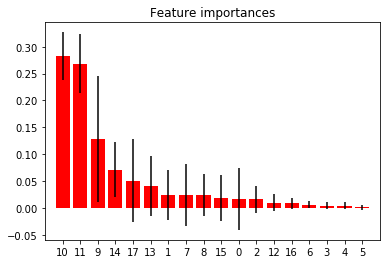

In [99]:
#importances = forest.feature_importances_
importances = better_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in better_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(prepared_df_values.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(prepared_df_values.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(prepared_df_values.shape[1]), indices)
plt.xlim([-1, prepared_df_values.shape[1]])
plt.show()


In [100]:
features = scaled_with_dropped_regions_hier_concantenated_df.columns

In [101]:
for i in indices:
    print(features[i])

ProportionOfOrganizationsToUseInternet
ProportionOfInnovativeOrgainzations
UsefulTechnologyNum
ProportionOfInnovativeProducts
InternalCosts
AmountOfInnovativeProducts
StaffNum
UsefulPatentsNum
CreatedTechnologyNum
Population
OrganizationNum
PhDNum
TechnologicalInnovationsCost
GrossProduct
PatentNum
Ph.DNum
PostgraduateNum
DoctoralNum


In [102]:
clipped_scaled_with_dropped_regions_hier_concantenated_df = scaled_with_dropped_regions_hier_concantenated_df[['ProportionOfOrganizationsToUseInternet', 'UsefulTechnologyNum', 'ProportionOfInnovativeOrgainzations', 'AmountOfInnovativeProducts', 'GrossProduct', 'ProportionOfInnovativeProducts', 'Ph.DNum']]

In [103]:
print(clipped_scaled_with_dropped_regions_hier_concantenated_df.columns)

Index(['ProportionOfOrganizationsToUseInternet', 'UsefulTechnologyNum',
       'ProportionOfInnovativeOrgainzations', 'AmountOfInnovativeProducts',
       'GrossProduct', 'ProportionOfInnovativeProducts', 'Ph.DNum'],
      dtype='object')


In [104]:
print(len(clipped_scaled_with_dropped_regions_hier_concantenated_df.columns))

7


In [105]:
clipped_prepared_df_values = clipped_scaled_with_dropped_regions_hier_concantenated_df.values
bandwidth_for_clipped = cluster.estimate_bandwidth(clipped_prepared_df_values, quantile=0.1, n_samples=clipped_scaled_with_dropped_regions_hier_concantenated_df.shape[0])
ms_1 = cluster.MeanShift(bandwidth=bandwidth_for_clipped, bin_seeding=True)
ms_1.fit(clipped_prepared_df_values)
labels_for_clipped = ms_1.labels_
cluster_centres_for_clipped = ms_1.cluster_centers_
labels_unique_for_clipped = np.unique(labels_for_clipped)
n_clusters_for_clipped_ = len(labels_unique_for_clipped)
print("number of estimated clusters : %d" % n_clusters_for_clipped_)

number of estimated clusters : 23


In [106]:
clf_1 = RandomForestClassifier(n_estimators=20)

In [107]:
param_dist_for_clipped = {"max_depth": [3, 7],
              "max_features": sp_randint(1, 7),
              "min_samples_split": sp_randint(2, 7),
              "min_samples_leaf": sp_randint(1, 7),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [108]:
n_iter_search = 20
random_search_1 = RandomizedSearchCV(clf_1, param_distributions=param_dist_for_clipped,
                                   n_iter=n_iter_search)

In [109]:
start = time()
random_search_1.fit(clipped_prepared_df_values, labels_for_clipped)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report_best_score(random_search_1.cv_results_)

/home/uldo/miniconda3/envs/DS/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


RandomizedSearchCV took 7.53 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.904 (std: 0.053)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.895 (std: 0.069)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.895 (std: 0.077)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}



In [110]:
better_clf_for_clipped = RandomForestClassifier(n_estimators=20, bootstrap=True, criterion='gini', max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5)

In [111]:
better_clf_for_clipped.fit(clipped_prepared_df_values, labels_for_clipped)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [112]:
better_clf_for_clipped.feature_importances_

array([ 0.28655099,  0.12778362,  0.19341489,  0.15286591,  0.03158006,
        0.15134386,  0.05646066])

Feature ranking:
1. feature 0 (0.286551)
2. feature 2 (0.193415)
3. feature 3 (0.152866)
4. feature 5 (0.151344)
5. feature 1 (0.127784)
6. feature 6 (0.056461)
7. feature 4 (0.031580)


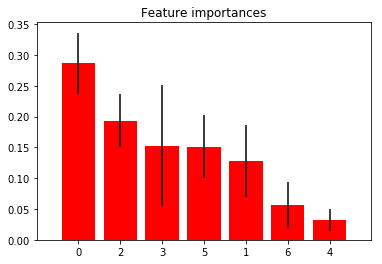

In [113]:
importances_for_clipped = better_clf_for_clipped.feature_importances_
std = np.std([tree.feature_importances_ for tree in better_clf_for_clipped.estimators_],
             axis=0)
indices_for_clipped = np.argsort(importances_for_clipped)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(clipped_prepared_df_values.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_for_clipped[f], importances_for_clipped[indices_for_clipped[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(clipped_prepared_df_values.shape[1]), importances_for_clipped[indices_for_clipped],
       color="r", yerr=std[indices_for_clipped], align="center")
plt.xticks(range(clipped_prepared_df_values.shape[1]), indices_for_clipped)
plt.xlim([-1, clipped_prepared_df_values.shape[1]])
plt.show()

In [114]:
features_for_clipped = clipped_scaled_with_dropped_regions_hier_concantenated_df.columns

In [115]:
for i in indices_for_clipped:
    print(features_for_clipped[i])

ProportionOfOrganizationsToUseInternet
ProportionOfInnovativeOrgainzations
AmountOfInnovativeProducts
ProportionOfInnovativeProducts
UsefulTechnologyNum
Ph.DNum
GrossProduct


In [116]:
print(features_for_clipped)

Index(['ProportionOfOrganizationsToUseInternet', 'UsefulTechnologyNum',
       'ProportionOfInnovativeOrgainzations', 'AmountOfInnovativeProducts',
       'GrossProduct', 'ProportionOfInnovativeProducts', 'Ph.DNum'],
      dtype='object')


In [117]:
work_df = clipped_scaled_with_dropped_regions_hier_concantenated_df

In [118]:
print(work_df['ProportionOfOrganizationsToUseInternet'].min(), work_df['ProportionOfOrganizationsToUseInternet'].max())

0.0 1.0


In [119]:
print(work_df['ProportionOfInnovativeOrgainzations'].min(), work_df['ProportionOfInnovativeOrgainzations'].max())

0.0 1.0


In [120]:
y_mean_shift = ms_1.predict(clipped_prepared_df_values)

In [121]:
print(y_mean_shift.shape)

(770,)


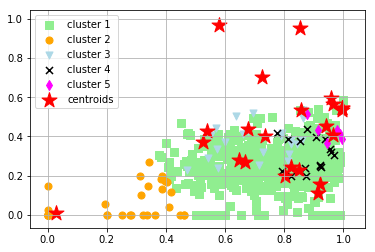

In [122]:
X = clipped_prepared_df_values
plt.scatter(X[y_mean_shift == 0, 0],
            X[y_mean_shift == 0, 2],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_mean_shift == 1, 0],
            X[y_mean_shift == 1, 2],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_mean_shift == 2, 0],
            X[y_mean_shift == 2, 2],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(X[y_mean_shift == 3, 0],
            X[y_mean_shift == 3, 2],
            s=50,
            c='black',
            marker='x',
            label='cluster 4'
           )
plt.scatter(X[y_mean_shift == 4, 0],
            X[y_mean_shift == 4, 2],
            s=50,
            c='magenta',
            marker='d',
            label='cluster 5'
           )
plt.scatter(ms_1.cluster_centers_[:, 0],
            ms_1.cluster_centers_[:, 2],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

In [123]:
cluster_centres_for_clipped = ms_1.cluster_centers_

In [124]:
print(cluster_centres_for_clipped.shape)

(23, 7)


In [125]:
print(cluster_centres.shape)

(5, 18)


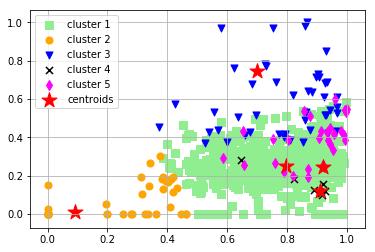

In [126]:
y_mean_shift = ms.predict(prepared_df_values)
X = prepared_df_values
plt.scatter(X[y_mean_shift == 0, 10],
            X[y_mean_shift == 0, 11],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_mean_shift == 1, 10],
            X[y_mean_shift == 1, 11],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_mean_shift == 2, 10],
            X[y_mean_shift == 2, 11],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(X[y_mean_shift == 3, 10],
            X[y_mean_shift == 3, 11],
            s=50,
            c='black',
            marker='x',
            label='cluster 4'
           )
plt.scatter(X[y_mean_shift == 4, 10],
            X[y_mean_shift == 4, 11],
            s=50,
            c='magenta',
            marker='d',
            label='cluster 5'
           )
plt.scatter(ms.cluster_centers_[:, 10],
            ms.cluster_centers_[:, 11],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

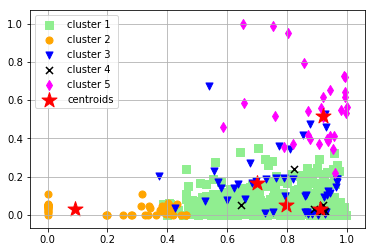

In [127]:
plt.scatter(X[y_mean_shift == 0, 10],
            X[y_mean_shift == 0, 9],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_mean_shift == 1, 10],
            X[y_mean_shift == 1, 9],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_mean_shift == 2, 10],
            X[y_mean_shift == 2, 9],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(X[y_mean_shift == 3, 10],
            X[y_mean_shift == 3, 9],
            s=50,
            c='black',
            marker='x',
            label='cluster 4'
           )
plt.scatter(X[y_mean_shift == 4, 10],
            X[y_mean_shift == 4, 9],
            s=50,
            c='magenta',
            marker='d',
            label='cluster 5'
           )
plt.scatter(ms.cluster_centers_[:, 10],
            ms.cluster_centers_[:, 9],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

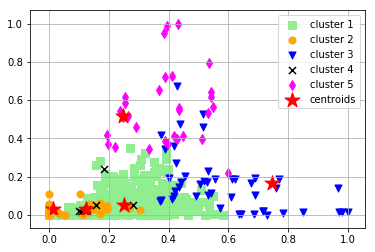

In [128]:
plt.scatter(X[y_mean_shift == 0, 11],
            X[y_mean_shift == 0, 9],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_mean_shift == 1, 11],
            X[y_mean_shift == 1, 9],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_mean_shift == 2, 11],
            X[y_mean_shift == 2, 9],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(X[y_mean_shift == 3, 11],
            X[y_mean_shift == 3, 9],
            s=50,
            c='black',
            marker='x',
            label='cluster 4'
           )
plt.scatter(X[y_mean_shift == 4, 11],
            X[y_mean_shift == 4, 9],
            s=50,
            c='magenta',
            marker='d',
            label='cluster 5'
           )
plt.scatter(ms.cluster_centers_[:, 11],
            ms.cluster_centers_[:, 9],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

In [129]:
print(ms.cluster_all)

True


In [130]:
print(ms.cluster_centers_)

[[  2.52838984e-02   8.63808017e-03   8.24432002e-03   5.96964381e-03
    1.76933536e-02   2.00848056e-02   1.24672088e-02   1.61797047e-02
    2.34376636e-02   4.87967122e-02   7.95518031e-01   2.50916553e-01
    1.72189443e-02   1.05079321e-02   6.43312648e-02   9.99595709e-02
    1.51028959e-03   5.23207795e-03]
 [  2.69598822e-02   1.12464125e-02   4.92650132e-03   3.18059111e-03
    7.79602952e-04   0.00000000e+00   5.47926499e-03   1.02346601e-02
    3.33958724e-02   3.17770206e-02   9.15159513e-02   1.26710025e-02
    5.40925320e-03   2.57283957e-03   1.85588122e-03   8.32737398e-02
    5.28357619e-04   4.60739181e-03]
 [  5.94098884e-02   4.49424658e-02   1.40308855e-02   9.08309962e-03
    2.88160283e-02   4.83672212e-02   4.59336514e-02   5.65504241e-02
    6.42276423e-02   1.68696339e-01   7.00134544e-01   7.47813411e-01
    5.10139035e-02   7.28840319e-02   1.86356073e-01   2.19223913e-01
    2.95077343e-03   1.95605573e-02]
 [  2.15311005e-02   3.42518831e-03   2.93567798e

In [131]:
#print(ms.labels_)

In [132]:
print(ms.labels_.shape)

(770,)


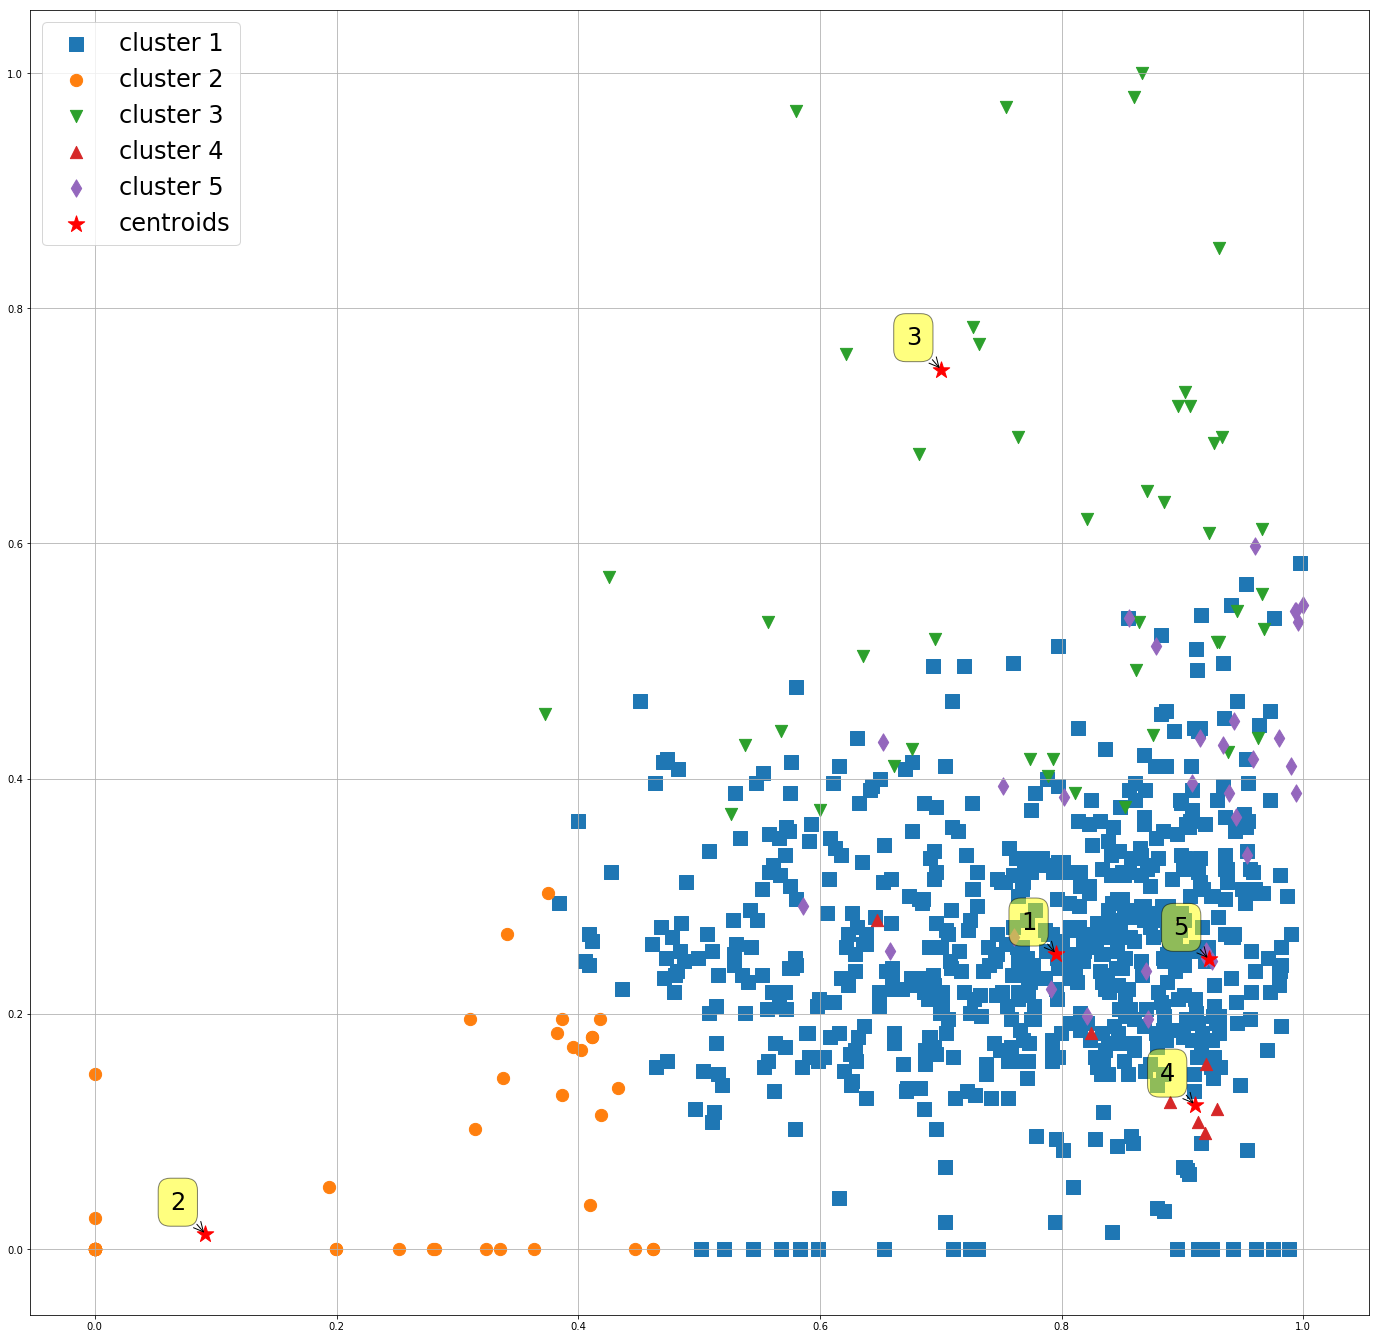

In [133]:
cmap = plt.cm.tab20
X = prepared_df_values
cluster_labels = ms.labels_
figure = plt.figure(figsize=(24, 24))
text_cluster_labels = ("1", "2", "3", "4", "5")
bool_cluster_labels = (cluster_labels == 0)
axes = figure.add_subplot(111)
axes.scatter(X[bool_cluster_labels, 10],
            X[bool_cluster_labels, 11],
            s=200,
            #c='lightgreen',
            marker='s',
            label='cluster 1',
            cmap=cmap
        )
bool_cluster_labels = (cluster_labels == 1)
axes.scatter(X[bool_cluster_labels, 10],
            X[bool_cluster_labels, 11],
            s=150,
            #c='orange',
            marker='o',
            label='cluster 2',
            cmap=cmap
        )
bool_cluster_labels = (cluster_labels == 2)
axes.scatter(X[bool_cluster_labels, 10],
            X[bool_cluster_labels, 11],
            s=150,
            #c='blue',
            marker='v',
            label='cluster 3',
            cmap=cmap
        )
bool_cluster_labels = (cluster_labels == 3)
axes.scatter(X[bool_cluster_labels, 10],
            X[bool_cluster_labels, 11],
            s=150,
            #c='black',
            marker='^',
            label='cluster 4',
            cmap=cmap
        )
bool_cluster_labels = (cluster_labels == 4)
axes.scatter(X[bool_cluster_labels, 10],
            X[bool_cluster_labels, 11],
            s=150,
            #c='magenta',
            marker='d',
            label='cluster 5',
            cmap=cmap
        )
axes.scatter(ms.cluster_centers_[:, 10],
            ms.cluster_centers_[:, 11],
            s=300,
            marker='*',
            c='red',
            label='centroids'
        )
for text_cluster_label, x, y in zip(
    text_cluster_labels,
    ms.cluster_centers_[:, 10],
    ms.cluster_centers_[:, 11]):
    axes.annotate(
        text_cluster_label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'), fontsize=24)
axes.legend(loc='upper left', prop={'size': 24})
axes.grid()
plt.show()

In [135]:
import clusters_drawer

In [146]:
importlib.reload(clusters_drawer)

<module 'clusters_drawer' from '/home/uldo/work/rank/hier-clustering/Task_1/clusters_drawer.py'>

[(10, 9), (10, 1), (9, 1)]


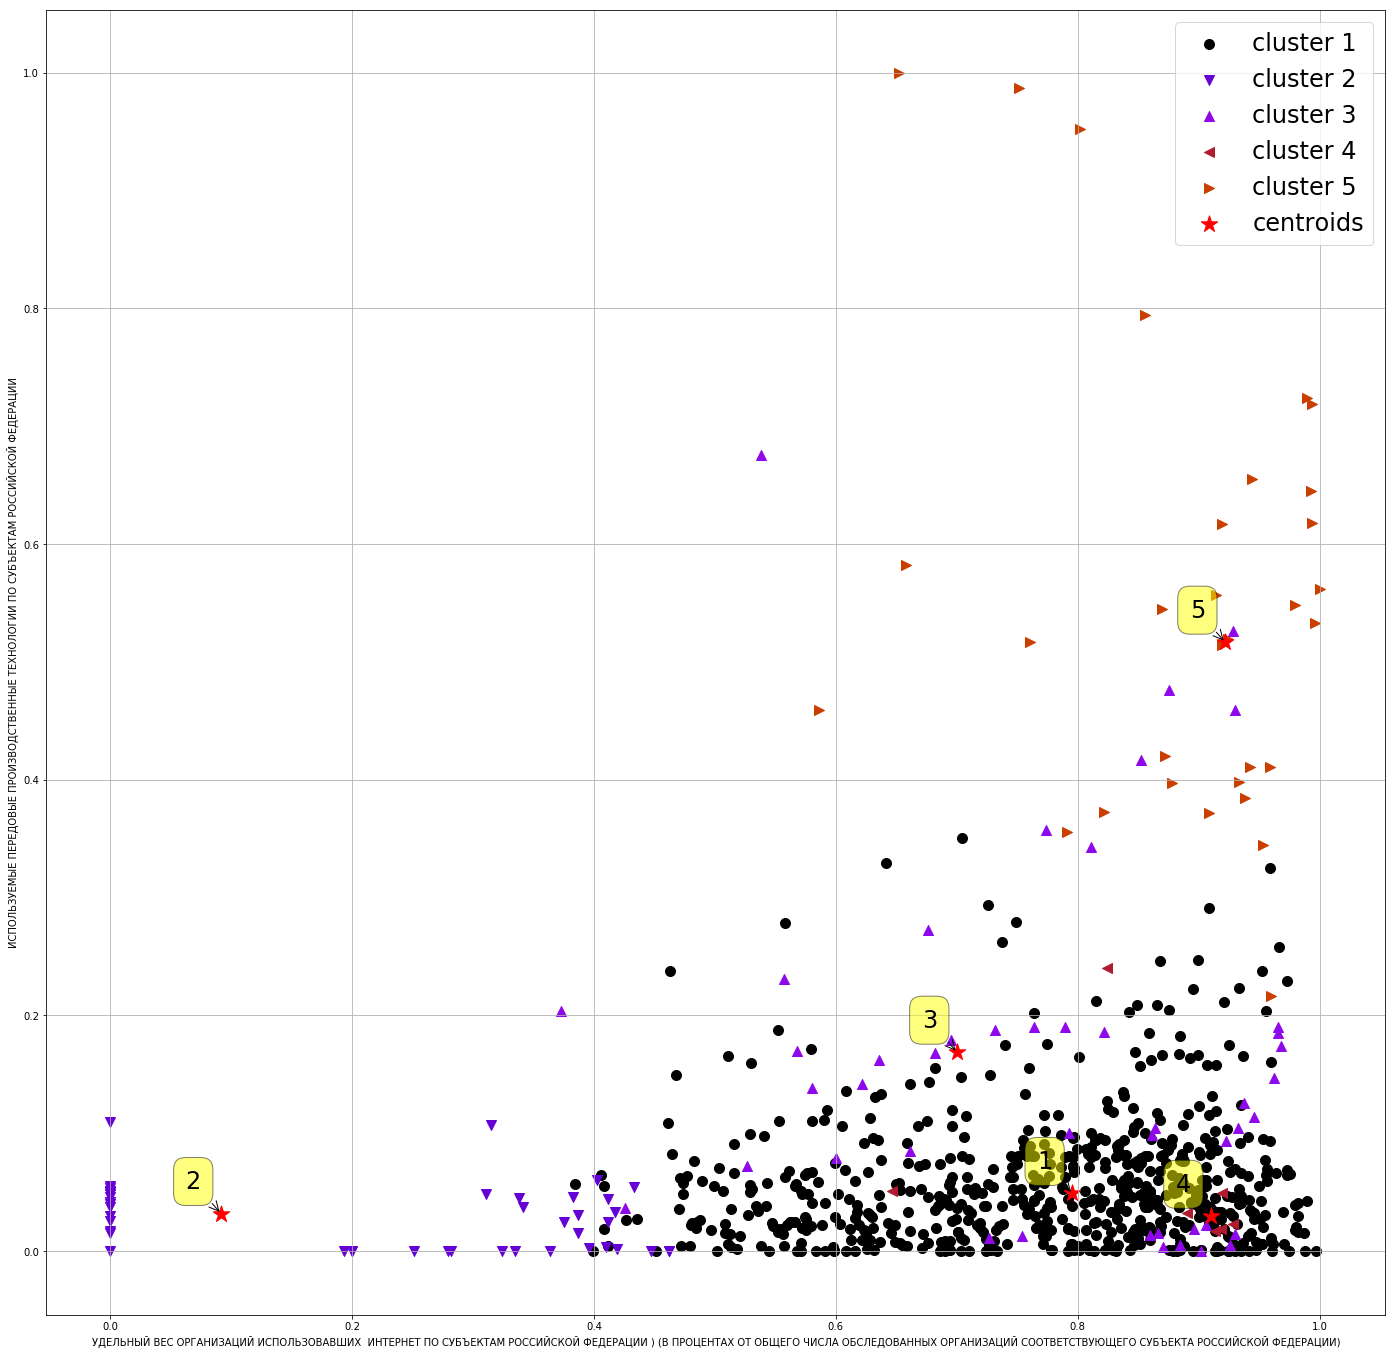

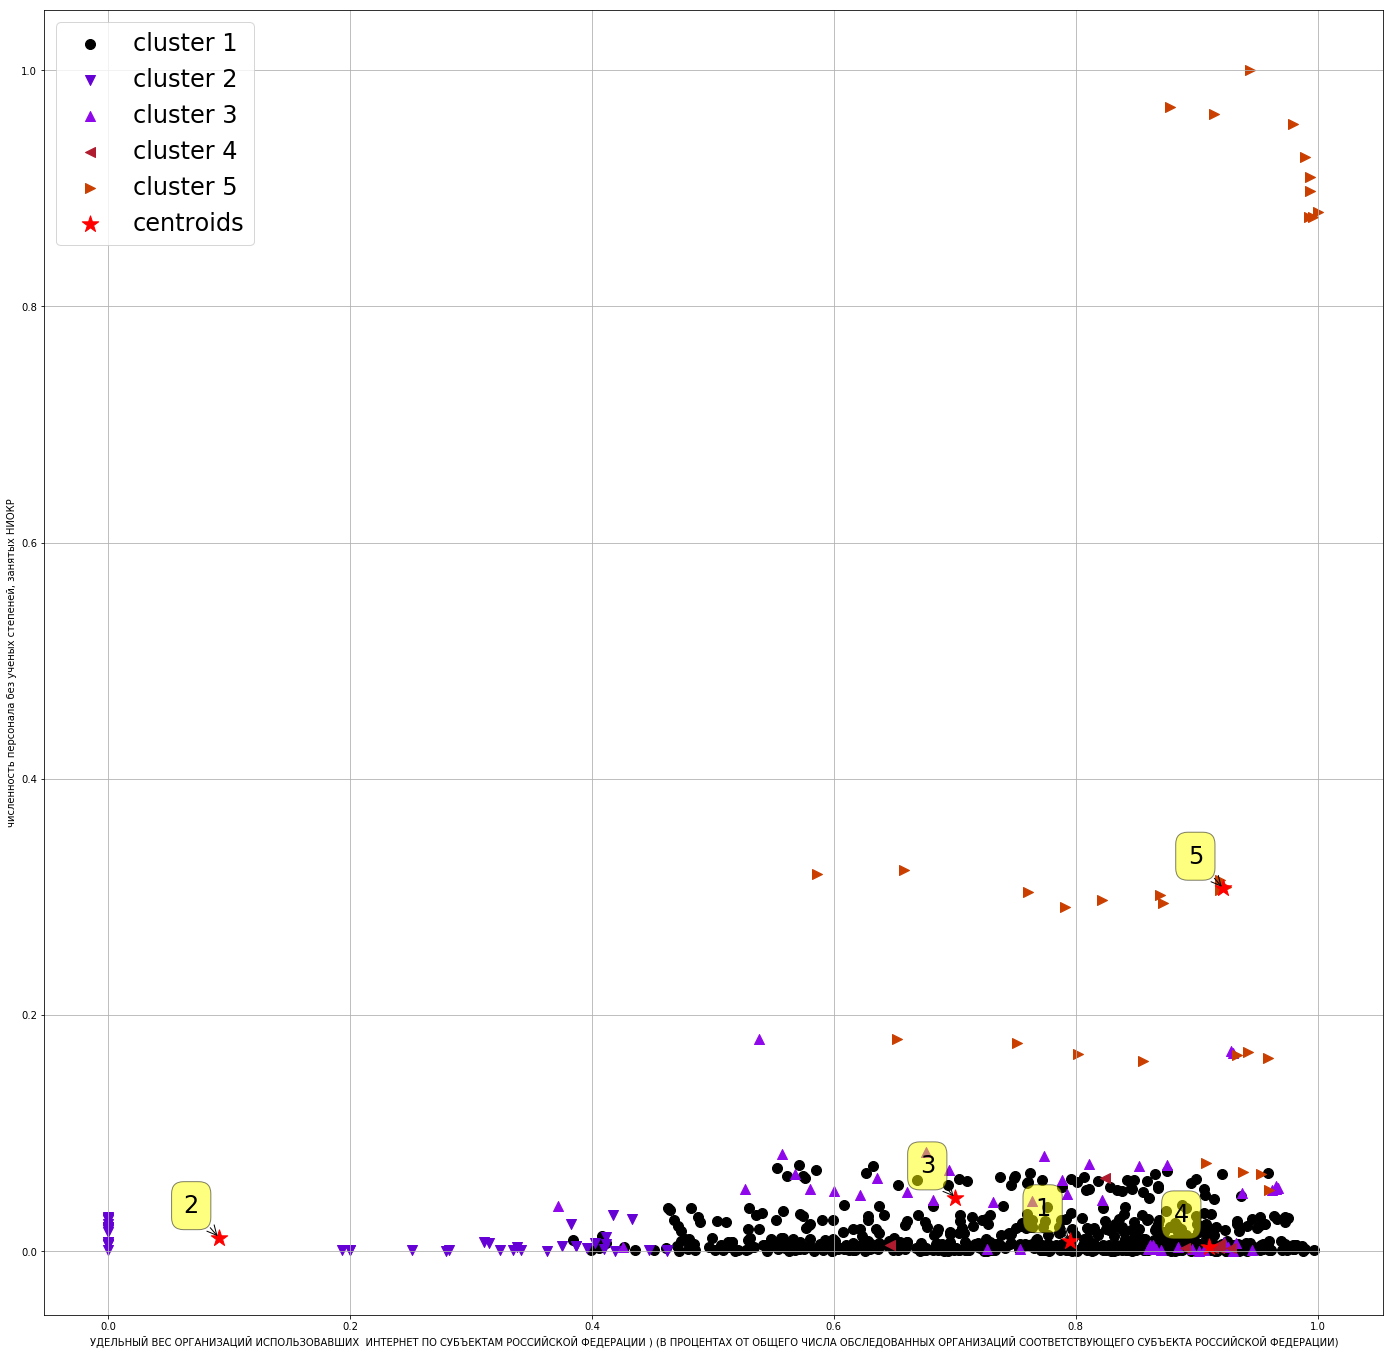

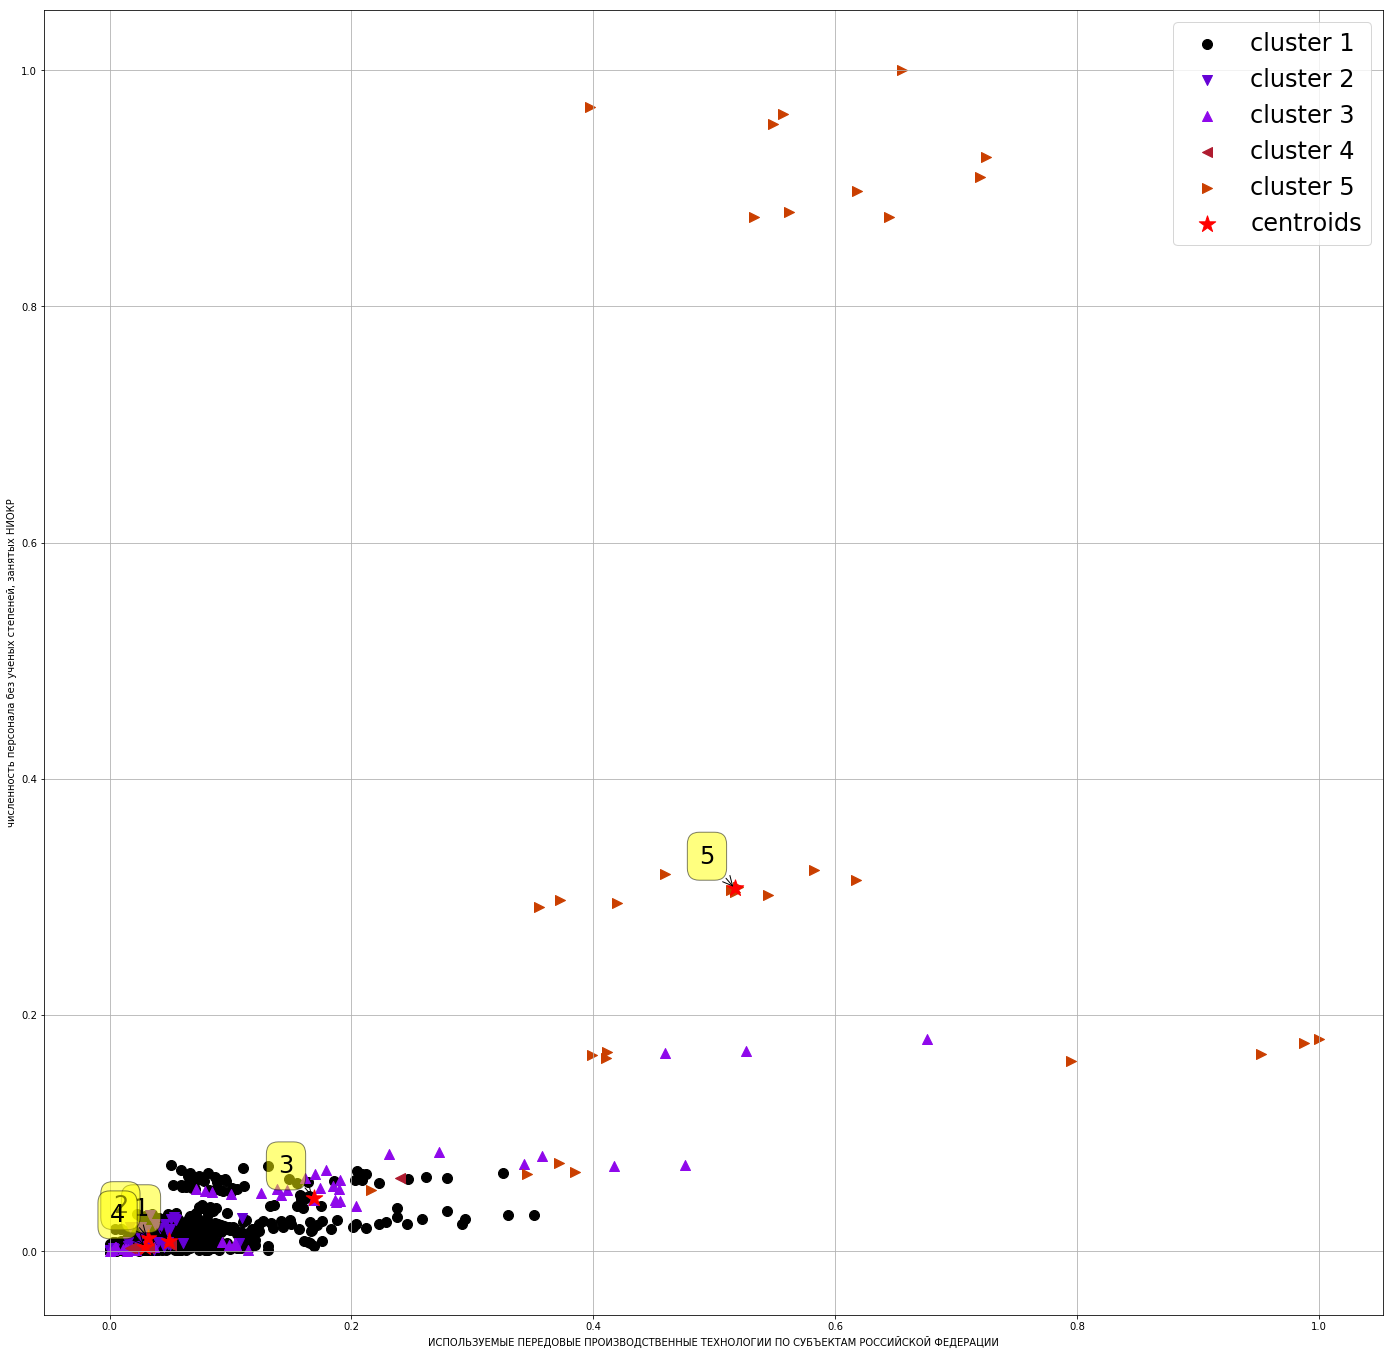

In [147]:
drawer = clusters_drawer.ClustersDrawer(
    plt,
    ms,
    X,
    (10, 9, 1),
    features_names=features_names_ru
)
drawer.data_point_size = 100
drawer.draw()

[(10, 1)]


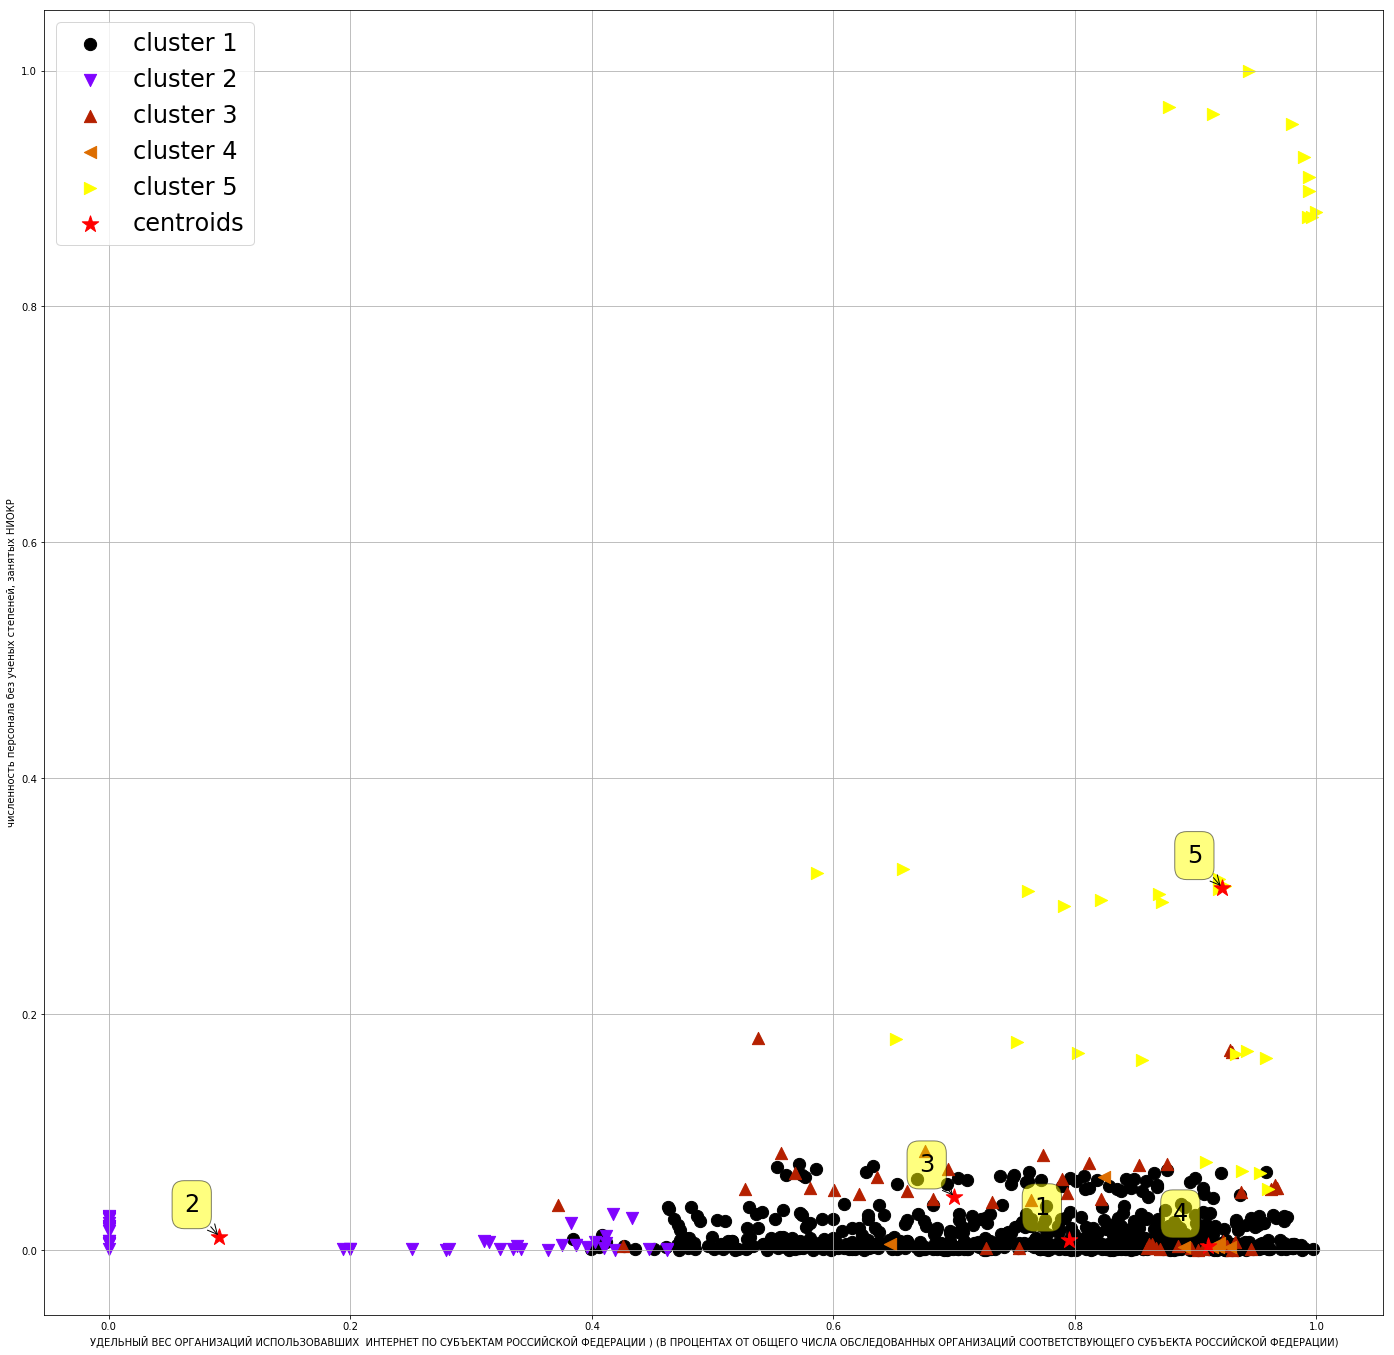

In [148]:
drawer = clusters_drawer.ClustersDrawer(plt, ms, X, (10, 1), features_names=features_names_ru)
drawer.data_point_size = 150
drawer.colormap = 'gnuplot'
drawer.colorstep = 64
drawer.draw()

In [139]:
drawer.colorstep

64

Следующие шаги:
1. Отрисовать все попарные проекции наиболее значимых features отобранных различными методами определения значимости (GradientBoosting, ExtraTreeClassifier).
2. Отрисовать графические представления кроскорреляционных матриц как описано здесь: https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/, и https://python-graph-gallery.com/111-custom-correlogram/.
3. Отрисовать кластеры регионов на карте регионов (по годам).
4. Попробовать обучить классификаторы (п.1) используя подмножества признаков отобранных по уровню значимости другими классификаторами.
5. Попробовать другие методы уменьшения размерности.
6. Другие методы кластеризации?
7. Интерпретация результатов.